In [1]:
##Import the requred libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
# #Creating pandas df
import io
df_R = pd.read_csv('Rose.csv')

In [3]:
# #Creating pandas df
import io
df_S = pd.read_csv('Sparkling.csv')

In [4]:
from pandas.tseries.offsets import BDay

Series has to be read as a daily series with Mon-Friday as weekdays, hence frequency is defined as Bday().. Else if you define frequency as 365, it would assume that exchange was working for all 365 days


In [5]:
df_R.shape

(187, 2)

In [6]:
df_R.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [7]:
df_S.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [8]:
rcParams['figure.figsize'] = 15,8

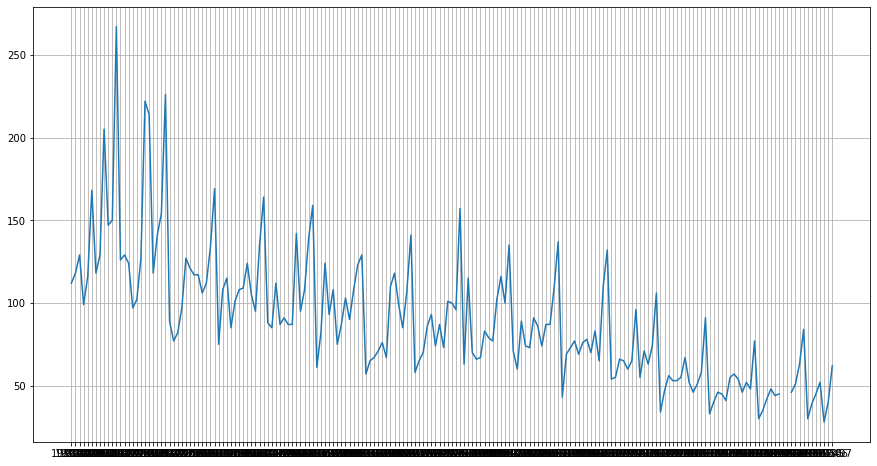

In [24]:
plt.plot(df_R['YearMonth'],df_R['Rose']);
plt.grid()

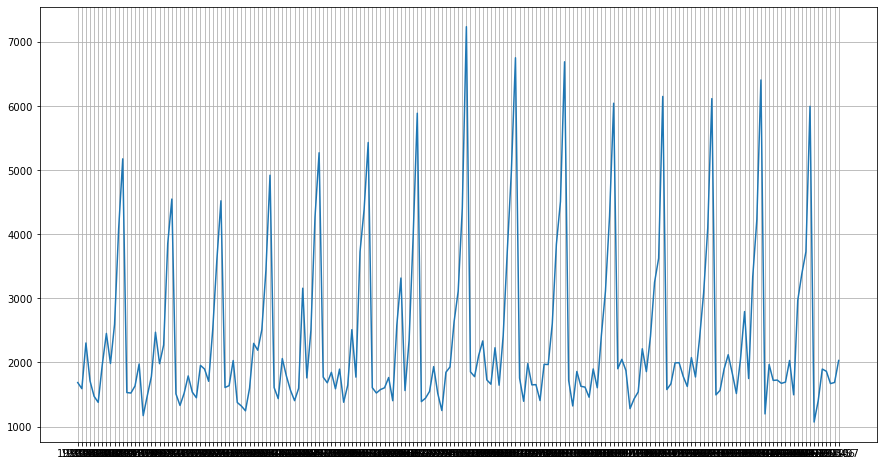

In [26]:
plt.plot(df_S['YearMonth'],df_S['Sparkling']);
plt.grid()

In [9]:
df_date = pd.DataFrame(df_R)

In [12]:
df_dateS = pd.DataFrame(df_S)

In [13]:
df_date.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [14]:
df_dateS.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [15]:
df_date['YearMonth'] = pd.to_datetime(df_date['YearMonth'])
df_dateS['YearMonth'] = pd.to_datetime(df_dateS['YearMonth'])

In [16]:
df_dateS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   YearMonth  187 non-null    datetime64[ns]
 1   Sparkling  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [465]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    datetime64[ns]
 1   Rose        187 non-null    float64       
 2   year        187 non-null    int64         
 3   month       187 non-null    int64         
 4   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 7.4 KB


In [17]:
df_dateS['year'] = pd.DatetimeIndex(df_dateS['YearMonth']).year
df_dateS['month'] = pd.DatetimeIndex(df_dateS['YearMonth']).month

In [18]:
df_date['year'] = pd.DatetimeIndex(df_date['YearMonth']).year
df_date['month'] = pd.DatetimeIndex(df_date['YearMonth']).month

# Missing Values

In [19]:
df_date.isnull().sum()

YearMonth    0
Rose         2
year         0
month        0
dtype: int64

In [20]:
df_date.fillna(value =np.mean(df_date.Rose) , inplace = True)

# Plot the boxplot of the 'Sparkling' variable with respect to the different years.

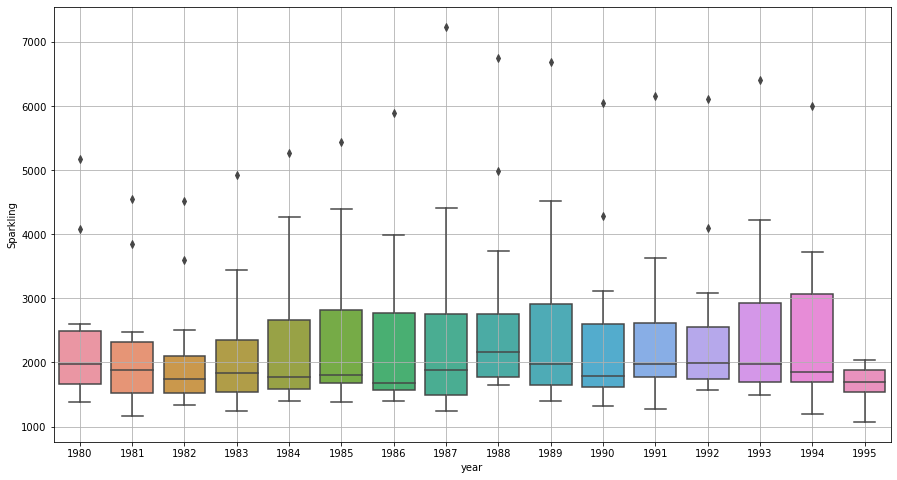

In [62]:
sns.boxplot(x =df_dateS['year'] ,y = df_dateS['Sparkling'])
plt.grid();

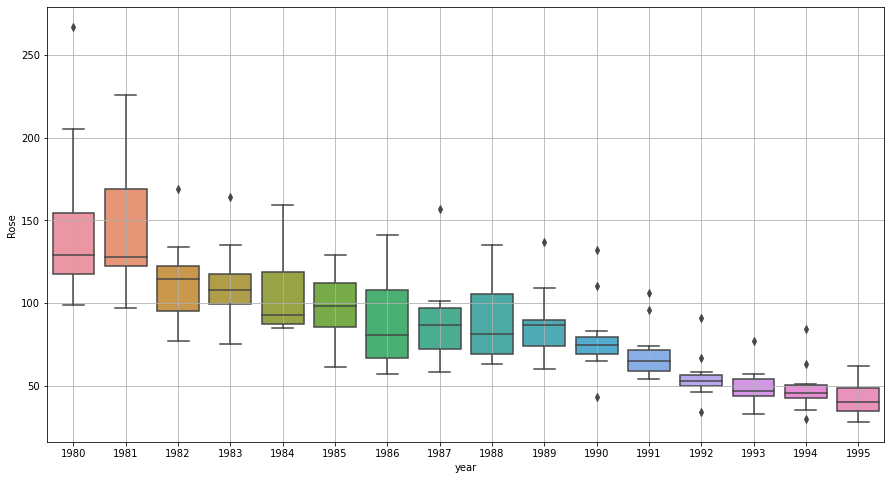

In [64]:
sns.boxplot(x =df_date['year'] ,y = df_date['Rose'])
plt.grid();

# Plot the boxplot of the 'Sparkling' variable with respect to months of different.

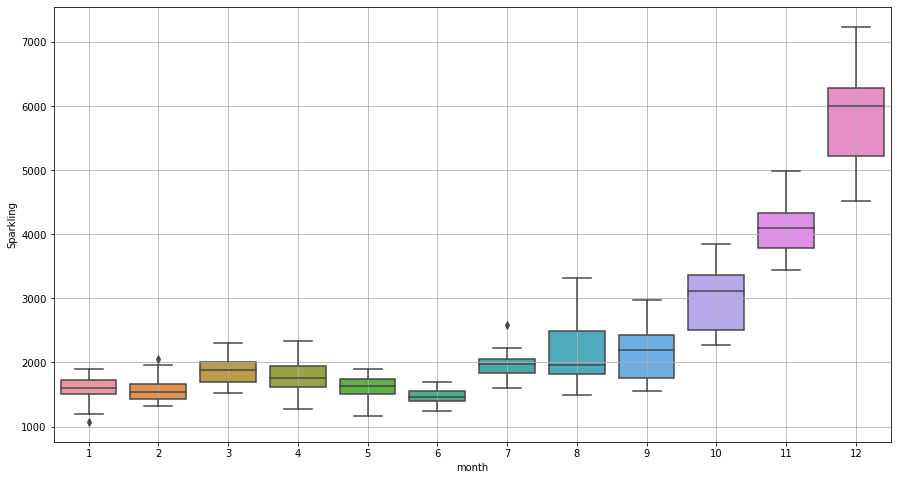

In [69]:
sns.boxplot(x =df_dateS['month'] ,y = df_dateS['Sparkling'])
plt.grid();

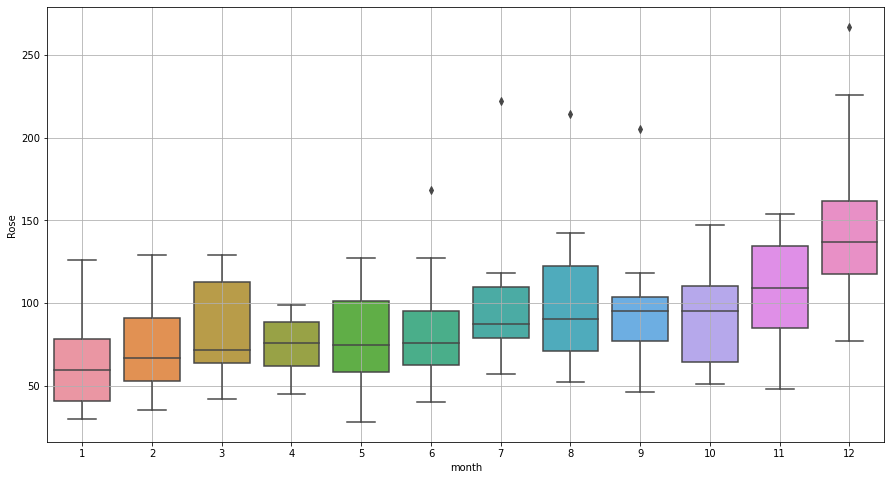

In [71]:
sns.boxplot(x =df_date['month'] ,y = df_date['Rose'])
plt.grid();

# Decompose the 'Volume' variable Time Series.

In [21]:
df_date.head()

YearMonth   Rose  year  month
0 1980-01-01  112.0  1980      1
1 1980-02-01  118.0  1980      2
2 1980-03-01  129.0  1980      3
3 1980-04-01   99.0  1980      4
4 1980-05-01  116.0  1980      5

In [40]:
df_date['Time_Stamp'] = pd.to_datetime(df_date['YearMonth'])
df_model = df_date.set_index('Time_Stamp')
df_model.drop(['year','month'], axis=1, inplace=True)
df_model.drop(['YearMonth'], axis=1, inplace=True)
df_model.tail()

Rose
Time_Stamp      
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [41]:
df_dateS['Time_Stamp'] = pd.to_datetime(df_dateS['YearMonth'])
df_modelS = df_dateS.set_index('Time_Stamp')
df_modelS.drop(['year','month'], axis=1, inplace=True)
df_modelS.drop(['YearMonth'], axis=1, inplace=True)
df_modelS.tail()

Sparkling
Time_Stamp           
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

# Decompose Rose Wine

In [24]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



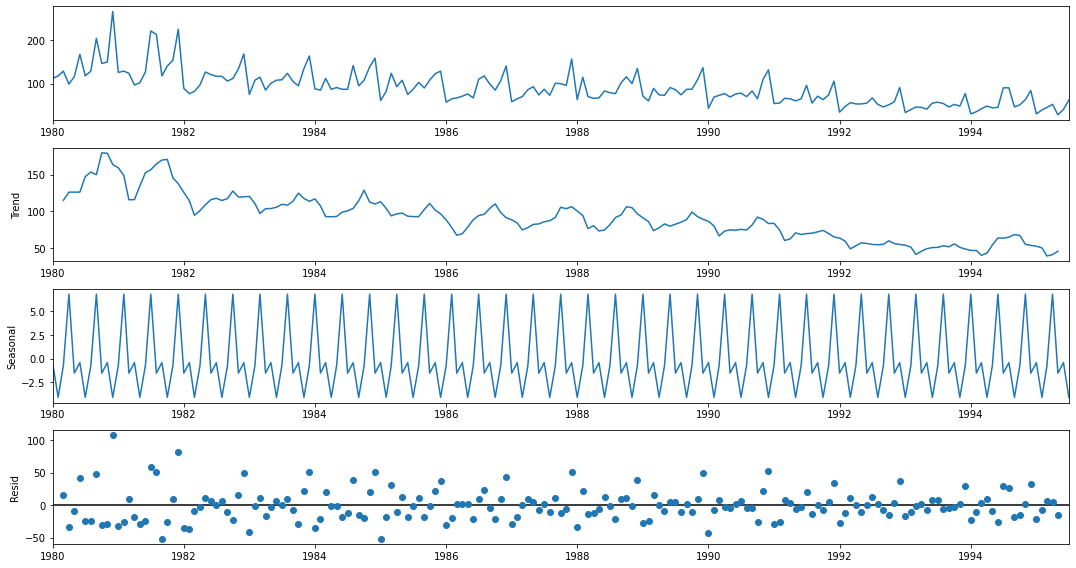

In [25]:
decomposition = seasonal_decompose(df_model,model='additive', freq=5)
decomposition.plot();

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



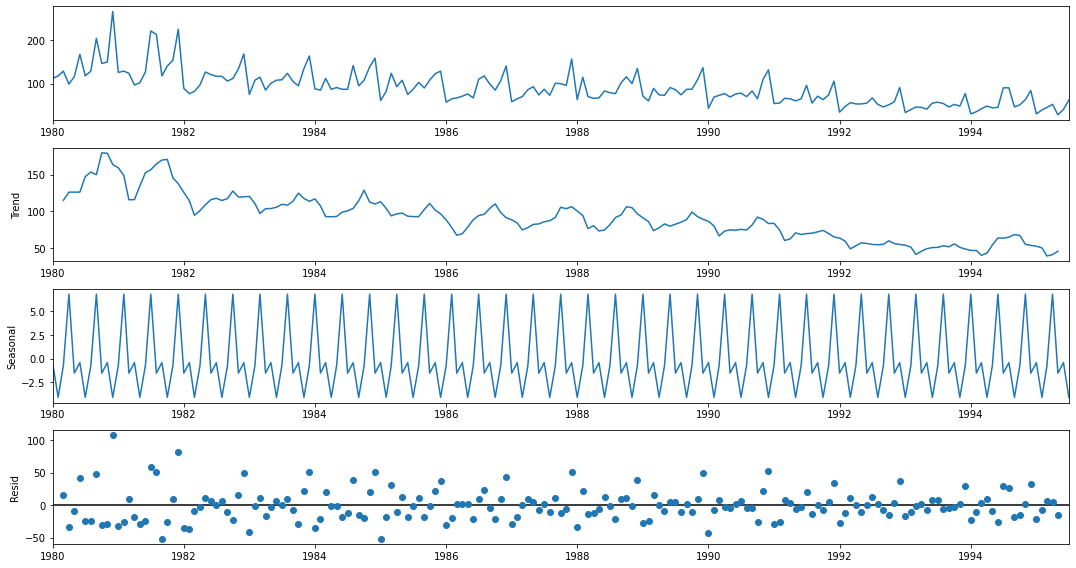

In [466]:
decomposition = seasonal_decompose(df_model,model='additive', freq=5)
decomposition.plot();

 The additive model is useful when the seasonal variation is relatively constant over time -- So series is Additive --

# Decompose Sparkling Wine

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



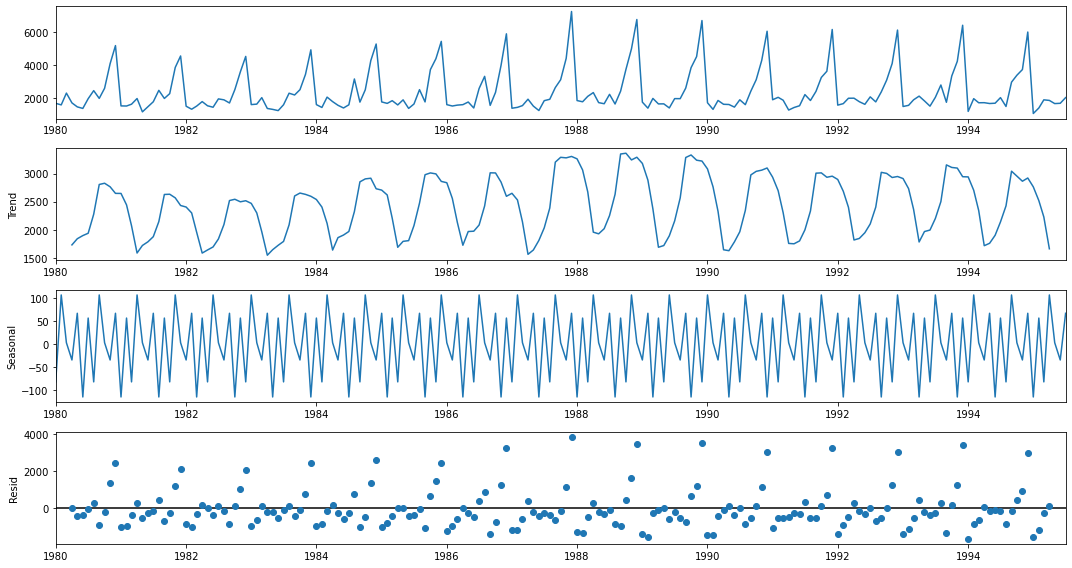

In [29]:
decomposition = seasonal_decompose(df_modelS,model='additive', freq=7)
decomposition.plot();

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



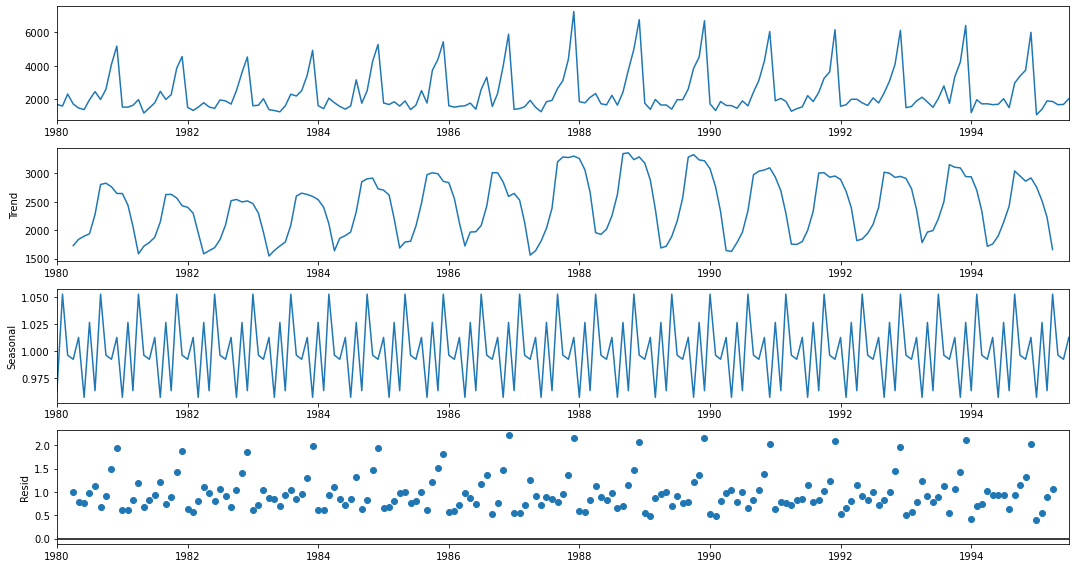

In [30]:
decomposition = seasonal_decompose(df_modelS,model='multiplicative', freq=7)
decomposition.plot();

 The additive model is useful when the seasonal variation is relatively constant over time -- So series is Additive --

# split into train n test -ROSE

In [44]:
df_model.head()

Rose
Time_Stamp       
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [46]:
train= df_model[pd.to_datetime(df_model.index) < pd.to_datetime('1991-01-01')]
train.shape

(132, 1)

In [47]:
test= df_model[pd.to_datetime(df_model.index) >= pd.to_datetime('1991-01-01')]
test.shape

(55, 1)

In [48]:
train_final = train[['Rose']]
test_final = test[['Rose']]


In [49]:
print(train_final.shape)
print(test_final.shape)

(132, 1)
(55, 1)


In [50]:
train_final.head()

Rose
Time_Stamp       
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

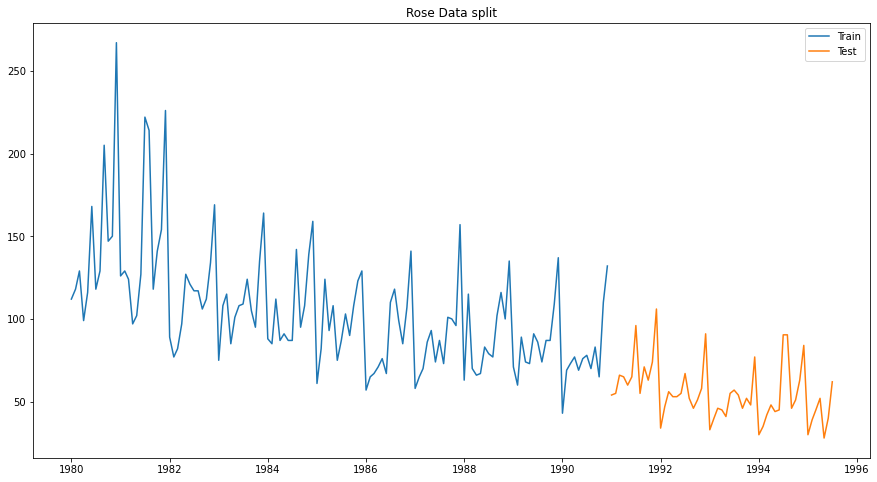

In [468]:

plt.plot(train_final.index, train_final, label = 'Train')
plt.plot(test_final.index, test_final,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Rose Data split')
plt.show()

# split into train n test -SPARKLING

In [52]:
df_modelS.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [53]:
trainS= df_modelS[pd.to_datetime(df_modelS.index) < pd.to_datetime('1991-01-01')]
trainS.shape

(132, 1)

In [54]:
testS= df_modelS[pd.to_datetime(df_modelS.index) >= pd.to_datetime('1991-01-01')]
testS.shape

(55, 1)

In [55]:
train_finalS = trainS[['Sparkling']]
test_finalS = testS[['Sparkling']]


In [56]:
print(train_finalS.shape)
print(test_finalS.shape)

(132, 1)
(55, 1)


In [57]:
train_finalS.head()

Sparkling
Time_Stamp           
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

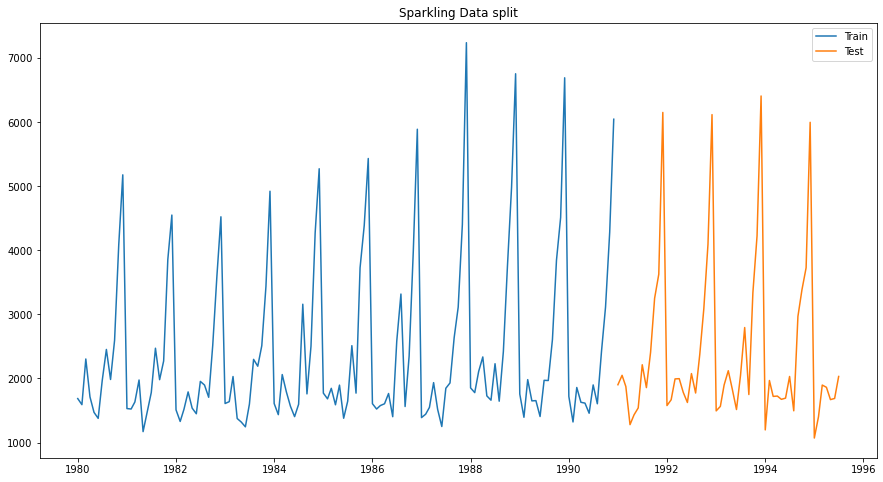

In [470]:

plt.plot(train_finalS.index, train_finalS, label = 'Train')
plt.plot(test_finalS.index, test_finalS,  label = 'Test')
plt.legend(loc = 'best')
plt.title('Sparkling Data split')
plt.show()

# exponential smoothing - Rose

In [69]:
import statsmodels.tsa.holtwinters     as      ets
import statsmodels.tools.eval_measures as      fa
from   sklearn.metrics                 import  mean_squared_error

In [70]:
pred = ets.ExponentialSmoothing(train_final, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(pred.params['smoothing_level'], 4))
print('Initial Level', np.round(pred.params['initial_level'], 4))
print('')
y_pred = pred.forecast(steps = 55)
#y_pred1 = pd.DataFrame(test_final)
y_pred


== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.0987
Initial Level 134.387



C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



1991-01-01    87.104999
1991-02-01    87.104999
1991-03-01    87.104999
1991-04-01    87.104999
1991-05-01    87.104999
1991-06-01    87.104999
1991-07-01    87.104999
1991-08-01    87.104999
1991-09-01    87.104999
1991-10-01    87.104999
1991-11-01    87.104999
1991-12-01    87.104999
1992-01-01    87.104999
1992-02-01    87.104999
1992-03-01    87.104999
1992-04-01    87.104999
1992-05-01    87.104999
1992-06-01    87.104999
1992-07-01    87.104999
1992-08-01    87.104999
1992-09-01    87.104999
1992-10-01    87.104999
1992-11-01    87.104999
1992-12-01    87.104999
1993-01-01    87.104999
1993-02-01    87.104999
1993-03-01    87.104999
1993-04-01    87.104999
1993-05-01    87.104999
1993-06-01    87.104999
1993-07-01    87.104999
1993-08-01    87.104999
1993-09-01    87.104999
1993-10-01    87.104999
1993-11-01    87.104999
1993-12-01    87.104999
1994-01-01    87.104999
1994-02-01    87.104999
1994-03-01    87.104999
1994-04-01    87.104999
1994-05-01    87.104999
1994-06-01    87

In [71]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_final,y_pred,squared=False)
print(rmse)

35.936212205429214


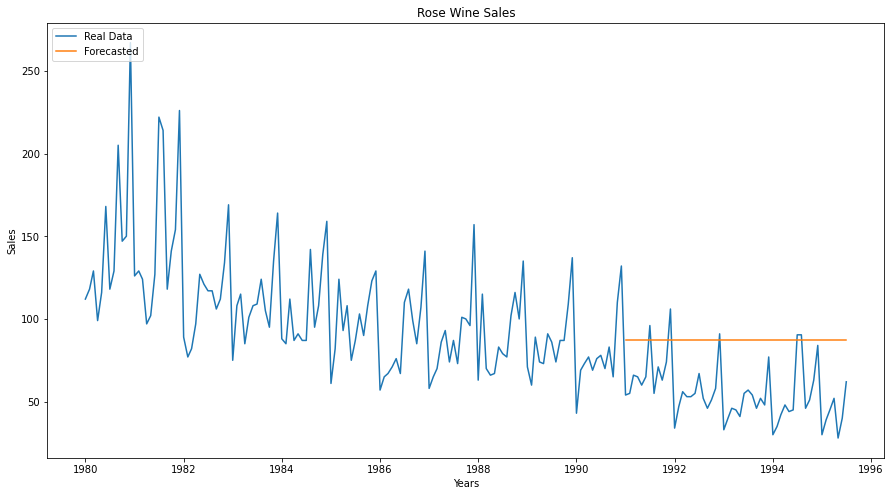

In [81]:
fig1, ax = plt.subplots()
ax.plot(df_model, label = 'Real Data')
ax.plot(y_pred, label = 'Forecasted')
plt.legend(loc = 'upper left')
plt.title('Rose Wine Sales')
plt.ylabel('Sales')
plt.xlabel('Years')
plt.show()

# exponential smoothing -Sparkling

In [82]:
predS = ets.ExponentialSmoothing(train_finalS, trend = None, damped = False, seasonal = None).fit()
print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Smoothing Level', np.round(pred.params['smoothing_level'], 4))
print('Initial Level', np.round(pred.params['initial_level'], 4))
print('')
y_predS = predS.forecast(steps = 55)
#y_pred1 = pd.DataFrame(test_final)



== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Smoothing Level 0.0987
Initial Level 134.387



C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [74]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test_finalS,y_predS,squared=False)
print(rmse)

1275.0818230401253


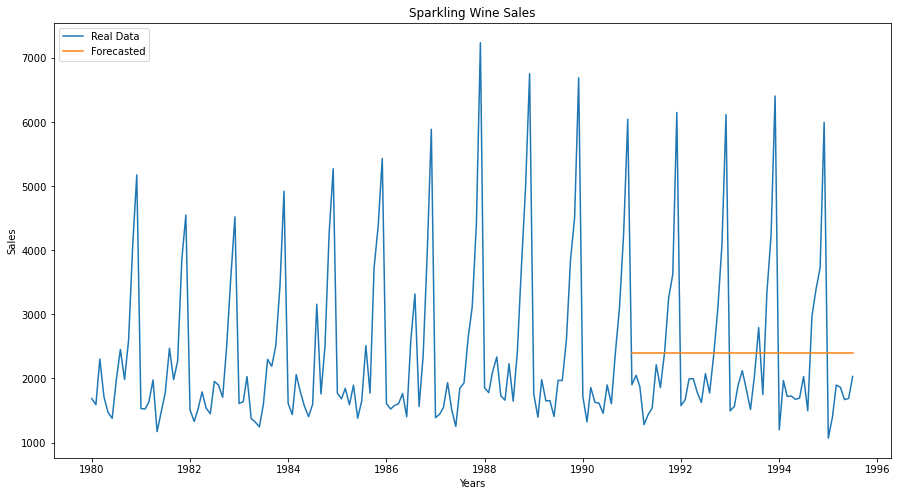

In [79]:
fig1, ax = plt.subplots()
ax.plot(df_modelS, label = 'Real Data')
ax.plot(y_predS, label = 'Forecasted')
plt.legend(loc = 'upper left')
plt.title('Sparkling Wine Sales')
plt.ylabel('Sales')
plt.xlabel('Years')
plt.show()

# SimpleExpSmoothing - ROSE

In [85]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing


For alpha = 0.10,  RMSE is 35.9672


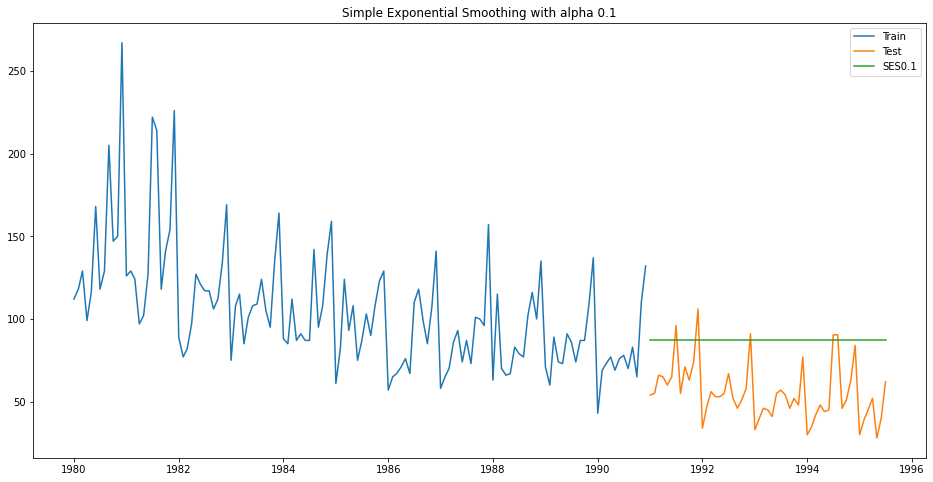

For alpha = 0.05,  RMSE is 36.1458


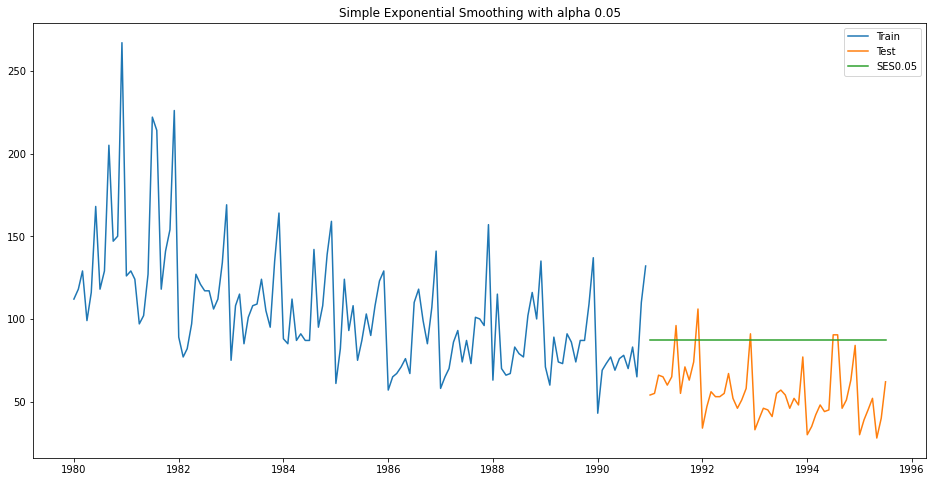

For alpha = 0.99,  RMSE is 78.1770


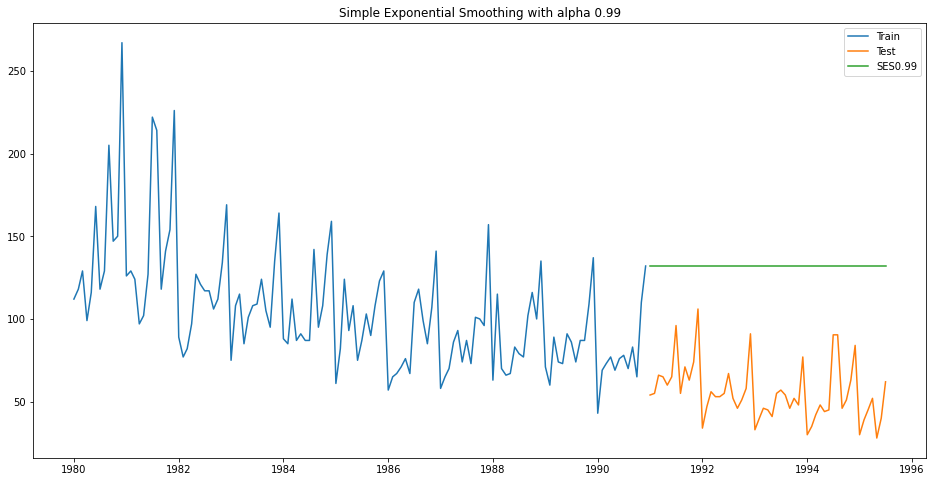

In [91]:
# fit model
model = SimpleExpSmoothing(np.asarray(train_final))
#defining the various values of alpha for which we want to run the model
alpha_list = [0.1, 0.05, 0.99] # 0.1 is best

pred_SES  = test_final.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES" + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_SES[alpha_str]  =  mode_fit_i.forecast(len(test_final))#calculating the forecasts for the test set 
    #time period
    rmse                 =  np.sqrt(mean_squared_error(test_final, pred_SES[alpha_str]))#calculate the RMSE
    #for the test set
    #mape                 =  MAPE(test['Consumption'],pred_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("For alpha = %1.2f,  RMSE is %3.4f" %(alpha_value, rmse))
    plt.figure(figsize=(16,8))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train.index, train_final, label ='Train')
    plt.plot(test.index, test_final, label  ='Test')
    plt.plot(test.index, pred_SES[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

# SimpleExpSmoothing - Sparkling

For alpha = 0.04,  RMSE is 1305.4630


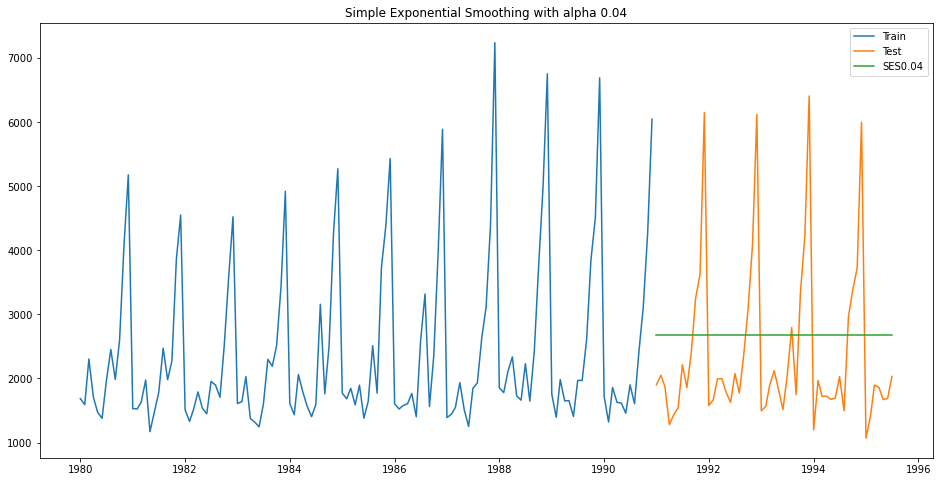

For alpha = 0.03,  RMSE is 1293.1101


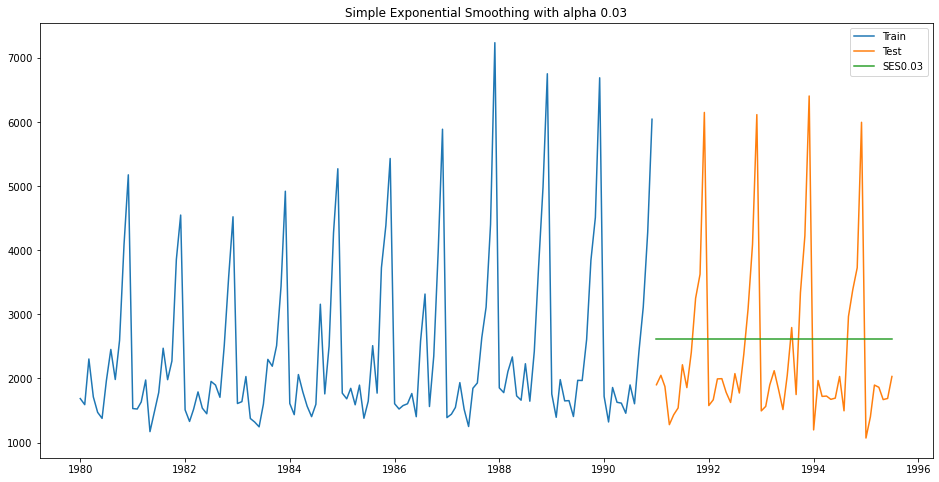

For alpha = 0.02,  RMSE is 1279.4952


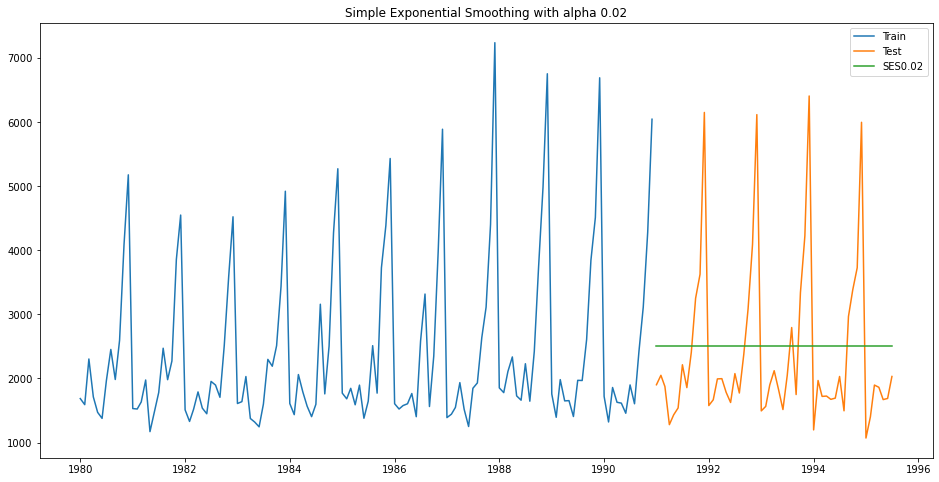

For alpha = 0.01,  RMSE is 1281.0327


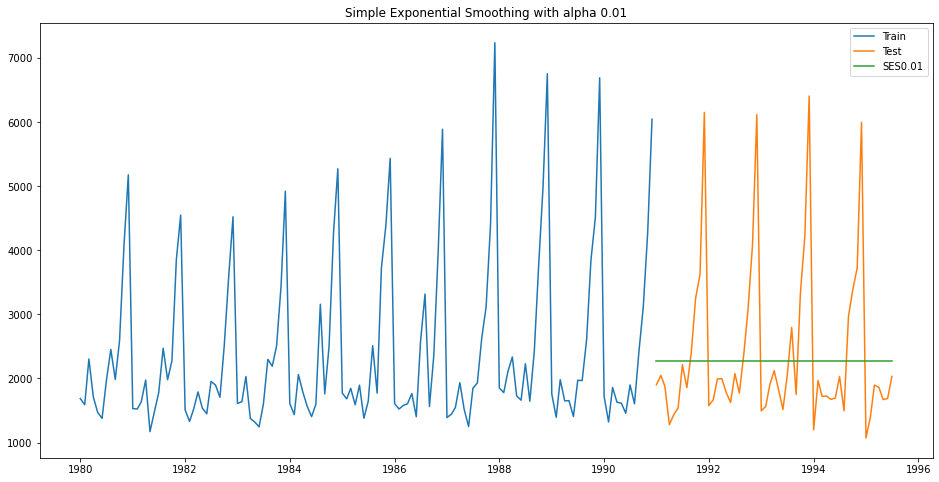

In [95]:
# fit model
model = SimpleExpSmoothing(np.asarray(train_finalS))
#defining the various values of alpha for which we want to run the model
alpha_list = [0.04, 0.03, 0.02,0.01] # 0.02 is best

pred_SES_S  = test_finalS.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES" + str(alpha_value)
    mode_fit_i           =  model.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_SES_S[alpha_str]  =  mode_fit_i.forecast(len(test_finalS))#calculating the forecasts for the test set 
    #time period
    rmse                 =  np.sqrt(mean_squared_error(test_finalS, pred_SES_S[alpha_str]))#calculate the RMSE
    #for the test set
    #mape                 =  MAPE(test['Consumption'],pred_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("For alpha = %1.2f,  RMSE is %3.4f" %(alpha_value, rmse))
    plt.figure(figsize=(16,8))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train.index, train_finalS, label ='Train')
    plt.plot(test.index, test_finalS, label  ='Test')
    plt.plot(test.index, pred_SES_S[alpha_str], label  = alpha_str)
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
    plt.legend(loc='best') 
    plt.show()

# Holt Winter - ROSE

In [96]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt

In [99]:
model = Holt(np.asarray(train_final))

model_fit = model.fit()


print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Smoothing Slope', np.round(model_fit.params['smoothing_slope'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))

Pred_Holt = test_final.copy()

Pred_Holt['Opt'] = model_fit.forecast(len(test_final))
rmse                 =  np.sqrt(mean_squared_error(test_final, Pred_Holt['Opt']))#calculate the RMSE
print('')
print('rmse = ',rmse)


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.1579
Smoothing Slope 0.1579
Initial Level 112.0

rmse =  68.97191721347805


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



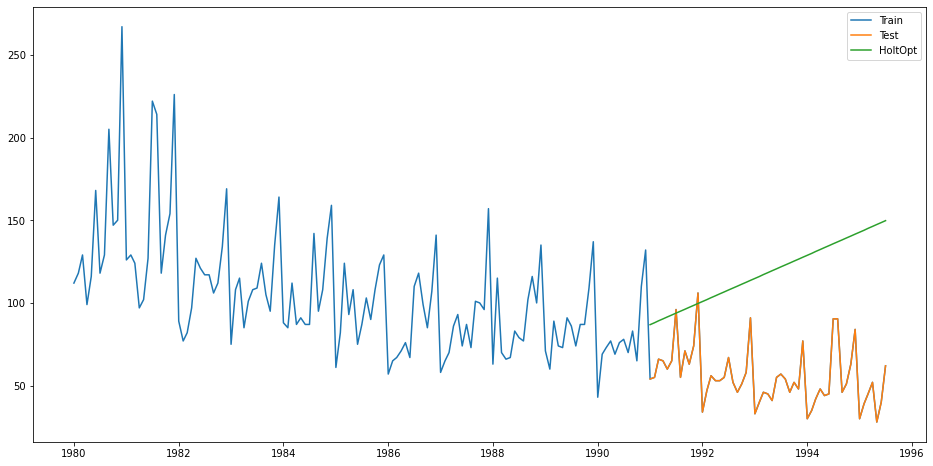

In [98]:
plt.figure(figsize=(16,8))
plt.plot(df_model, label='Train')
plt.plot(test_final, label='Test')
plt.plot(Pred_Holt['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

# Holt Winter - Sparkilling

In [96]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt

In [100]:
modelS = Holt(np.asarray(train_finalS))

model_fitS = modelS.fit()

print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fitS.params['smoothing_level'], 4)
print('Smoothing Level', alpha_value )
print('Smoothing Slope', np.round(model_fitS.params['smoothing_slope'], 4))
print('Initial Level',   np.round(model_fitS.params['initial_level'], 4))

Pred_HoltS = test_finalS.copy()

Pred_HoltS['Opt'] = model_fitS.forecast(len(test_finalS))
rmse                 =  np.sqrt(mean_squared_error(test_finalS, Pred_HoltS['Opt']))#calculate the RMSE
print('')
print('rmse = ',rmse)


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.6478
Smoothing Slope 0.0
Initial Level 1686.0838

rmse =  3850.98979591091


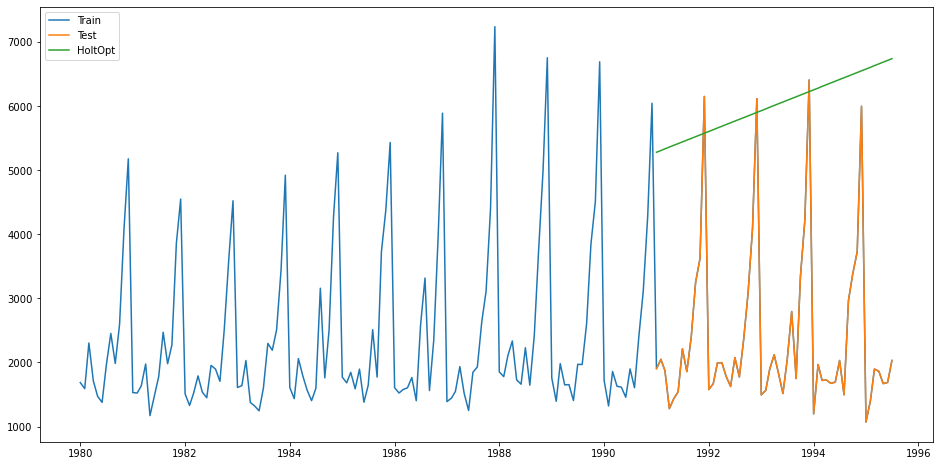

In [101]:
plt.figure(figsize=(16,8))
plt.plot(df_modelS, label='Train')
plt.plot(test_finalS, label='Test')
plt.plot(Pred_HoltS['Opt'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

# ExponentialSmoothing - Holt - Rose

In [102]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

In [624]:
pred1 = ExponentialSmoothing(np.asarray(train_final), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods =12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred1.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))
print('')

### Forecast for next 16 months

y_pred1 =  pred1.forecast(steps = 55)
df_pred1 = pd.DataFrame(y_pred1)
print(y_pred1)
rmse                 =  np.sqrt(mean_squared_error(test_final, y_pred1))#calculate the RMSE
print('')
print('rmse = ',rmse)


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.1335
Smoothing Slope:  0.0138
Smoothing Seasonal:  0.0
Initial Level:  76.3871
Initial Slope:  0.0
Initial Seasons:  [ 38.6837  51.0181  58.9908  48.3259  57.1174  62.5433  72.4269  78.5
  74.4768  72.5434  90.6143 132.8645]

[ 44.13086951  56.06984308  63.64717316  52.58687575  60.98300375
  66.01356413  75.50179111  81.17947647  76.76087184  74.43206842
  92.10759106 133.96243864  39.38630462  51.32527818  58.90260827
  47.84231086  56.23843886  61.26899923  70.75722622  76.43491158
  72.01630695  69.68750352  87.36302616 129.21787374  34.64173972
  46.58071329  54.15804337  43.09774596  51.49387396  56.52443434
  66.01266132  71.69034668  67.27174205  64.94293863  82.61846127
 124.47330885  29.89717483  41.83614839  49.41347848  38.35318107
  46.74930907  51.77986944  61.26809643  66.94578179  62.52717716
  60.19837373  77.87389637 119.72874395  25.15260993  37.0915835
  44.66891358  33.60861617  42.00474417  47

In [625]:
y_pred1 =  pred1.forecast(steps = 365)

In [626]:
test_final['pred'] = y_pred1

ValueError: Length of values does not match length of index

In [122]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    55 non-null     float64
 1   pred    55 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [126]:
test_final.drop('pred', axis = 1,inplace = True)

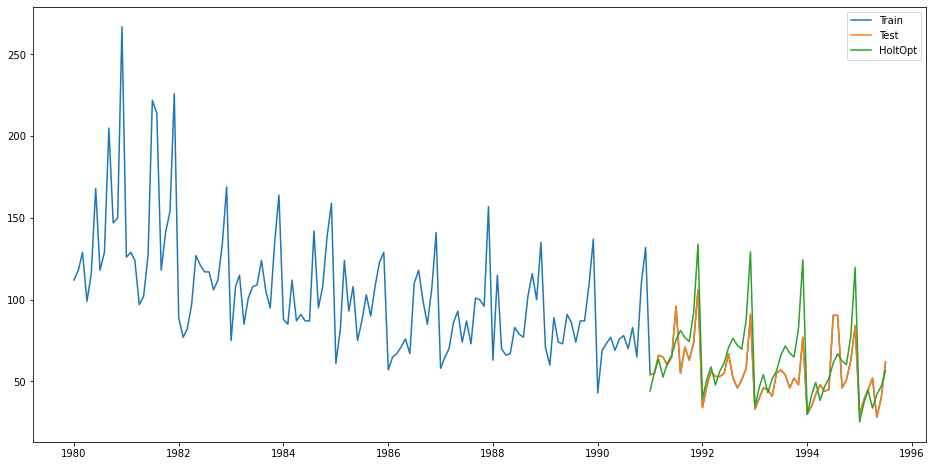

In [123]:
plt.figure(figsize=(16,8))
plt.plot(df_model, label='Train')
plt.plot(test_final['Rose'], label='Test')
plt.plot(test_final['pred'], label='HoltOpt')
plt.legend(loc='best')
plt.show()

# ExponentialSmoothing - Holt - Sprkling

In [102]:
from   statsmodels.tsa.holtwinters     import  SimpleExpSmoothing, Holt, ExponentialSmoothing

In [152]:
pred1S = ExponentialSmoothing(np.asarray(train_finalS), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods =12).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(pred1S.params['smoothing_level'], 4)
print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', np.round(pred1S.params['smoothing_slope'], 4))
print('Smoothing Seasonal: ', np.round(pred1S.params['smoothing_seasonal'], 4))
print('Initial Level: ', np.round(pred1S.params['initial_level'], 4))
print('Initial Slope: ', np.round(pred1S.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(pred1S.params['initial_seasons'], 4))
print('')

### Forecast for next 16 months

y_pred1S =  pred1S.forecast(steps = 55)
df_pred1S = pd.DataFrame(y_pred1S)
print(y_pred1S)
rmse                 =  np.sqrt(mean_squared_error(test_finalS, y_pred1S))#calculate the RMSE
print('')
print('rmse = ',rmse)


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0862
Smoothing Slope:  0.0
Smoothing Seasonal:  0.4764
Initial Level:  1684.7567
Initial Slope:  0.0066
Initial Seasons:  [  39.1987  -37.2623  465.1161  205.8324 -140.6978 -156.9213  338.0668
  856.7698  403.4567  971.2481 2401.6944 3426.8878]

[1532.42220106 1241.3806271  1726.78106455 1584.32041775 1494.02321663
 1311.48257493 1834.86960146 1696.16516248 2338.93503917 3249.31407962
 4324.46670777 6461.43229959 1532.50187479 1241.46030083 1726.86073827
 1584.40009147 1494.10289035 1311.56224865 1834.94927518 1696.2448362
 2339.01471289 3249.39375335 4324.54638149 6461.51197331 1532.58154851
 1241.53997455 1726.94041199 1584.47976519 1494.18256407 1311.64192237
 1835.0289489  1696.32450992 2339.09438661 3249.47342707 4324.62605521
 6461.59164704 1532.66122223 1241.61964827 1727.02008571 1584.55943891
 1494.2622378  1311.72159609 1835.10862262 1696.40418364 2339.17406034
 3249.55310079 4324.70572894 6461.67132076 1

In [136]:
test_finalS['pred'] = y_pred1S

In [137]:
test_finalS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1991-01-01 to 1995-07-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sparkling  55 non-null     int64  
 1   pred       55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


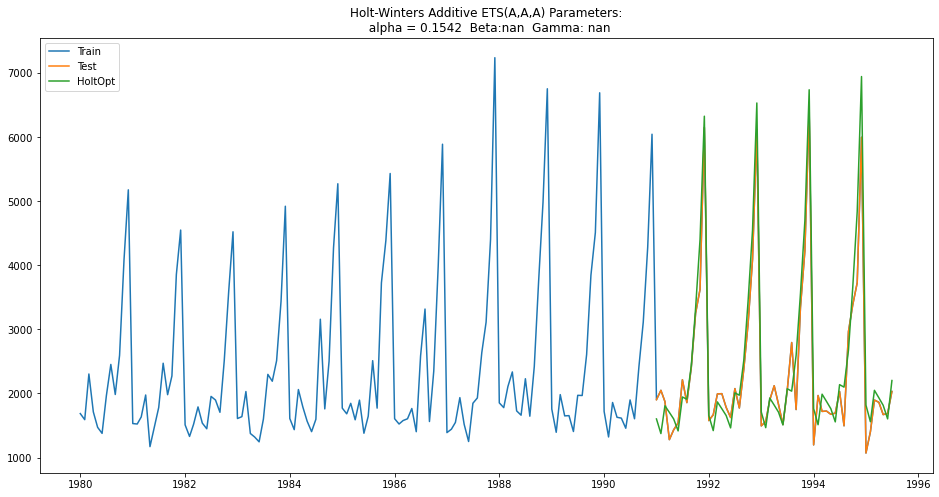

In [138]:
plt.figure(figsize=(16,8))
plt.plot(df_modelS, label='Train')
plt.plot(test_finalS['Sparkling'], label='Test')
plt.plot(test_finalS['pred'], label='HoltOpt')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(np.round(pred.params['smoothing_slope'], 4)) +
          '  Gamma: ' + str(np.round(pred.params['smoothing_seasonal'], 4)))
plt.legend(loc='best')
plt.show()

In [149]:
test_finalS.drop('pred', axis = 1,inplace = True)

# Naive

In [183]:
def naive(x,y):
    l1 = x.shape[0]
    first = x.iloc[(l-1):,:].values.tolist()[0]
    l2 = y.shape[0]
    return first * l2

In [184]:
pred = naive(train_finalS,test_finalS)

In [185]:
test_finalS['pred'] = pred

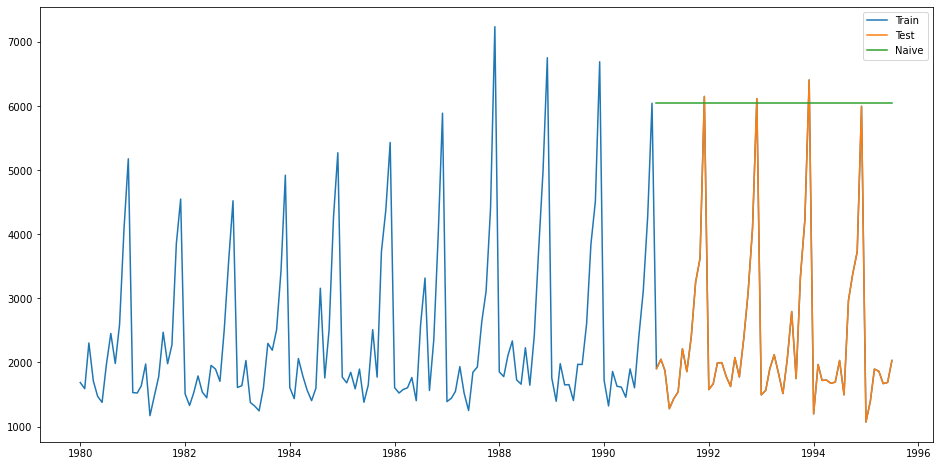

In [187]:
plt.figure(figsize=(16,8))
plt.plot(df_modelS, label='Train')
plt.plot(test_finalS['Sparkling'], label='Test')
plt.plot(test_finalS['pred'], label='Naive')
plt.legend(loc='best')
plt.show()

In [190]:
test_finalS.drop('pred', axis = 1,inplace = True)

# Moving Avg -Rose

In [206]:
y_hat_avg = test_final.copy()
y_hat_avg['pred30'] = train_final['Rose'].rolling(30).mean().iloc[-1]
y_hat_avg['pred120'] = train_final['Rose'].rolling(120).mean().iloc[-1]
y_hat_avg['pred90'] = train_final['Rose'].rolling(90).mean().iloc[-1]
y_hat_avg['pred45'] = train_final['Rose'].rolling(45).mean().iloc[-1]

In [214]:
rmse30                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avg['pred30']))#calculate the RMSE
rmse120                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avg['pred120']))#calculate the RMSE
rmse90                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avg['pred90']))#calculate the RMSE
rmse45                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avg['pred45']))#calculate the RMSE
print('')
print('rmse30 = ',rmse30, ' ', 'rmse120 = ',rmse120, ' ','rmse90 = ',rmse90, ' ','rmse45 = ',rmse45, ' ',)


rmse30 =  2640.9474931959894   rmse120 =  2628.3608132294544   rmse90 =  2635.1307354828564   rmse45 =  2640.266399952105  


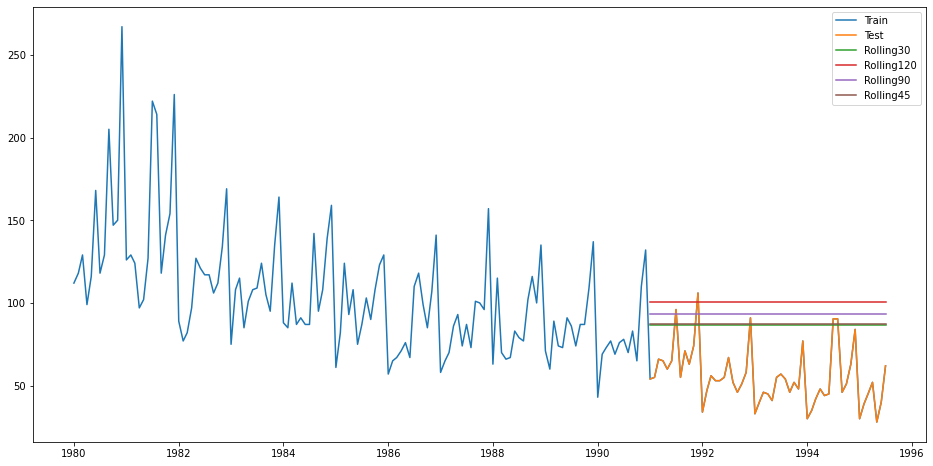

In [208]:
plt.figure(figsize=(16,8))
plt.plot(df_model, label='Train')
plt.plot(test_final['Rose'], label='Test')
plt.plot(y_hat_avg['pred30'], label='Rolling30')
plt.plot(y_hat_avg['pred120'], label='Rolling120')
plt.plot(y_hat_avg['pred90'], label='Rolling90')
plt.plot(y_hat_avg['pred45'], label='Rolling45')
plt.legend(loc='best')
plt.show()

# Moving Avg -Sparkling


In [209]:
y_hat_avgS = test_finalS.copy()
y_hat_avgS['pred30'] = train_finalS['Sparkling'].rolling(30).mean().iloc[-1]
y_hat_avgS['pred120'] = train_finalS['Sparkling'].rolling(120).mean().iloc[-1]
y_hat_avgS['pred90'] = train_finalS['Sparkling'].rolling(90).mean().iloc[-1]
y_hat_avgS['pred45'] = train_finalS['Sparkling'].rolling(45).mean().iloc[-1]

In [213]:
rmse30S                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avgS['pred30']))#calculate the RMSE
rmse120S                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avgS['pred120']))#calculate the RMSE
rmse90S                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avgS['pred90']))#calculate the RMSE
rmse45S                =  np.sqrt(mean_squared_error(test_finalS, y_hat_avgS['pred45']))#calculate the RMSE
print('')
print('rmse30 = ',rmse30S, ' ', 'rmse120 = ',rmse120S, ' ','rmse90 = ',rmse90S, ' ','rmse45 = ',rmse45S, ' ',)


rmse30 =  1319.8547913319935   rmse120 =  1275.1003691604362   rmse90 =  1282.264490576531   rmse45 =  1300.7967114040346  


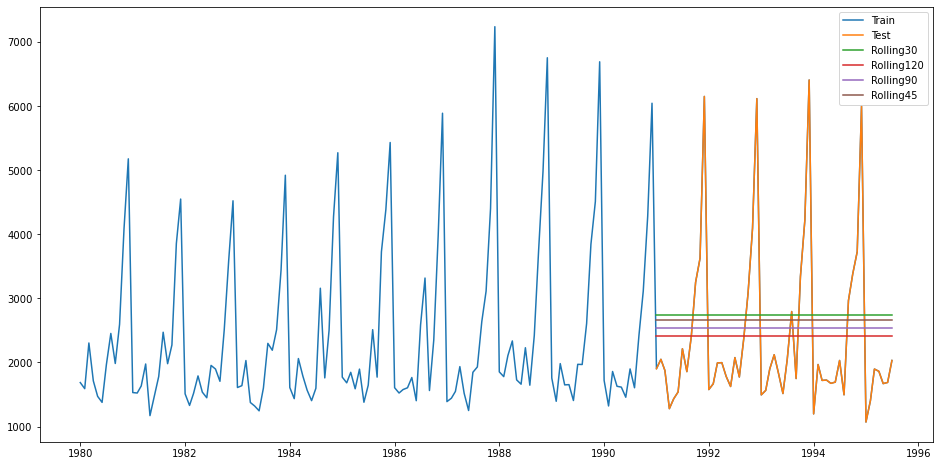

In [212]:
plt.figure(figsize=(16,8))
plt.plot(df_modelS, label='Train')
plt.plot(test_finalS['Sparkling'], label='Test')
plt.plot(y_hat_avgS['pred30'], label='Rolling30')
plt.plot(y_hat_avgS['pred120'], label='Rolling120')
plt.plot(y_hat_avgS['pred90'], label='Rolling90')
plt.plot(y_hat_avgS['pred45'], label='Rolling45')
plt.legend(loc='best')
plt.show()


# Check for stationarity of the series at $\alpha$ = 0.05 using appropriate statistical tests.

In [215]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

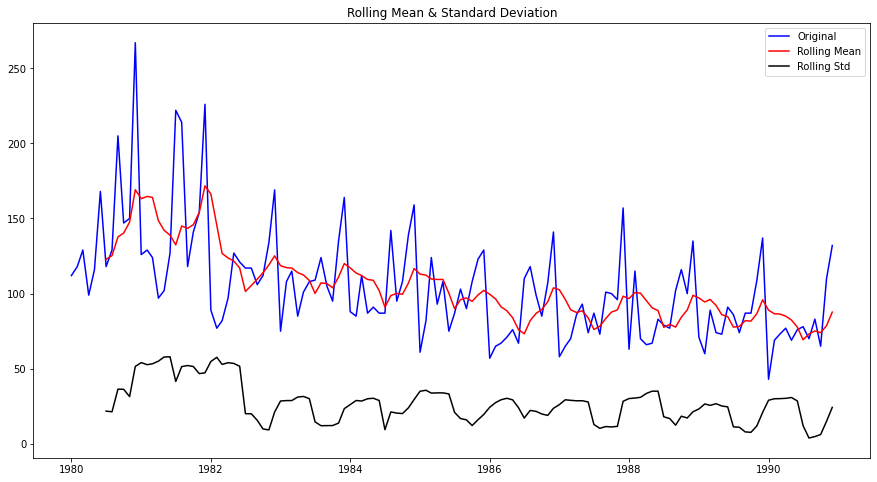

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [256]:
test_stationarity(train_final)

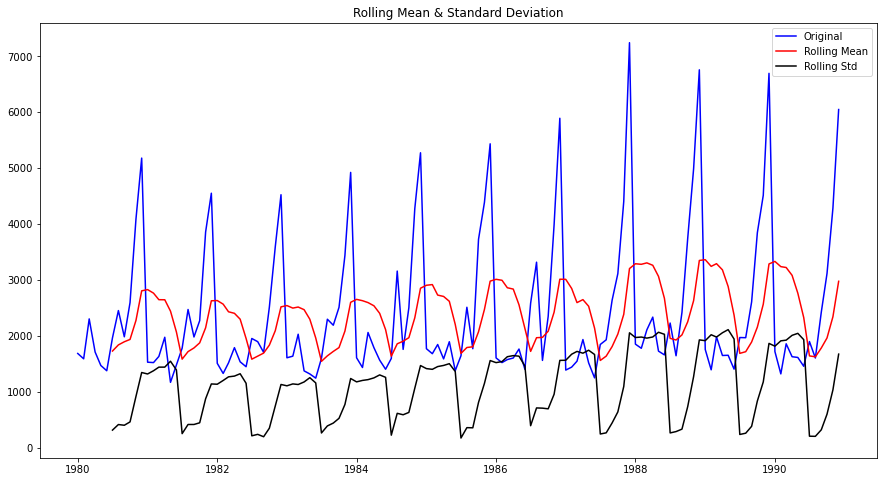

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [510]:
test_stationarity(train_finalS)

# Converting into Stationary by Log transformation

In [427]:
train_finalS_diif = train_finalS - train_finalS.shift(1)
train_finalS_diif.dropna(inplace = True)
#train_finalS_log = np.log(train_finalS)
#train_finalS_log_diff = train_finalS_log - train_finalS_log.shift(1)
#train_finalS_log_diff.dropna(inplace = True)

In [293]:
train_finalS_log_diff.shape

(131, 1)

In [391]:
train_finalS_diif1 = train_final - train_final.shift(1)
train_finalS_diif1.dropna(inplace = True)
train_finalS_log1 = np.log(train_final)
train_finalS_log_diff1 = train_finalS_log1 - train_finalS_log1.shift(1)
train_finalS_log_diff1.dropna(inplace = True)

In [392]:
train_finalS_log_diff1.shape

(131, 1)

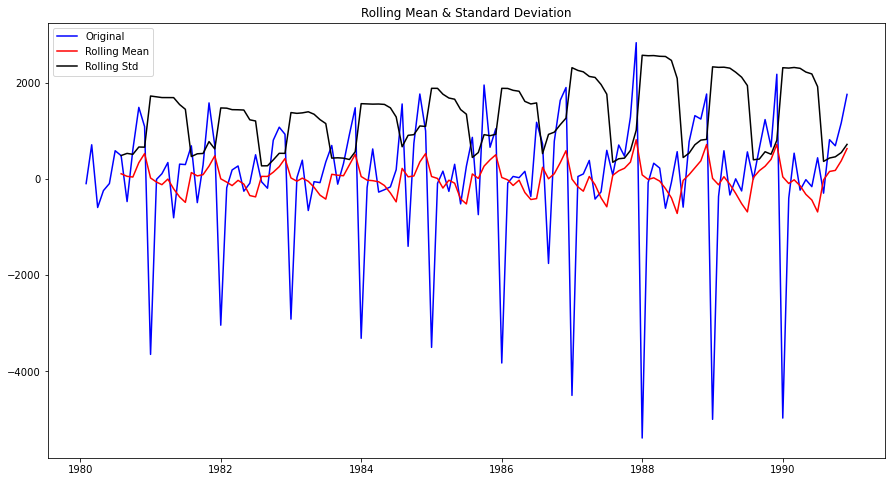

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [428]:
test_stationarity(train_finalS_diif)

In [276]:
import itertools
p = q = range(0, 3)
d= range(0,1)
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Model...')
print('Model: {}{}'.format(pdq[1], model_pdq[1]))
print('Model: {}{}'.format(pdq[1], model_pdq[2]))
print('Model: {}{}'.format(pdq[2], model_pdq[3]))
print('Model: {}{}'.format(pdq[2], model_pdq[4]))

Examples of parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 5)
Model: (0, 0, 1)(0, 0, 2, 5)
Model: (0, 0, 2)(1, 0, 0, 5)
Model: (0, 0, 2)(1, 0, 1, 5)


# Build an ARIMA model. - SPARKING - 1

In [277]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [438]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train_finalS['Sparkling'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0) - AIC:2271.203212328525
ARIMA(0, 0, 1) - AIC:2245.268851735056
ARIMA(0, 0, 2) - AIC:2245.343217573112
ARIMA(1, 0, 0) - AIC:2247.348271433395


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 1) - AIC:2245.9490899275593


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(1, 0, 2) - AIC:2246.0121931860363
ARIMA(2, 0, 0) - AIC:2244.7999184811133


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(2, 0, 1) - AIC:2236.590818439627


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(2, 0, 2) - AIC:2200.9044140597425


In [439]:
dfObj.sort_values(by=['AIC']).head()

param          AIC
2  (0, 0, 2)  1276.835382
5  (1, 0, 2)  1277.359225
4  (1, 0, 1)  1277.775750
7  (2, 0, 1)  1279.045689
8  (2, 0, 2)  1279.298694

In [440]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_finalS['Sparkling'], order=(0,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1112.392
Method:                       css-mle   S.D. of innovations           1159.696
Date:                Sun, 26 Jul 2020   AIC                           2232.783
Time:                        20:28:23   BIC                           2244.284
Sample:                    02-01-1980   HQIC                          2237.456
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.2469      3.800      1.644      0.100      -1.201      13.695
ma.L1.D.Sparkling    -0.5555      0.073     -7.583      0.000      -0.699      -0.412
ma.L2.D.Sparkling    -0.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [441]:
#final_hat_avg =train_finalS_diif.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_finalS))
pred_ARIMA[0]

array([3971.0522304 , 2800.61228907, 2806.85920179, 2813.10611451,
       2819.35302723, 2825.59993995, 2831.84685267, 2838.09376539,
       2844.3406781 , 2850.58759082, 2856.83450354, 2863.08141626,
       2869.32832898, 2875.5752417 , 2881.82215442, 2888.06906714,
       2894.31597986, 2900.56289258, 2906.80980529, 2913.05671801,
       2919.30363073, 2925.55054345, 2931.79745617, 2938.04436889,
       2944.29128161, 2950.53819433, 2956.78510705, 2963.03201977,
       2969.27893249, 2975.5258452 , 2981.77275792, 2988.01967064,
       2994.26658336, 3000.51349608, 3006.7604088 , 3013.00732152,
       3019.25423424, 3025.50114696, 3031.74805968, 3037.99497239,
       3044.24188511, 3050.48879783, 3056.73571055, 3062.98262327,
       3069.22953599, 3075.47644871, 3081.72336143, 3087.97027415,
       3094.21718687, 3100.46409959, 3106.7110123 , 3112.95792502,
       3119.20483774, 3125.45175046, 3131.69866318])

In [442]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_finalS,pred_ARIMA[0]))
print(rmse)

1417.4929156930339


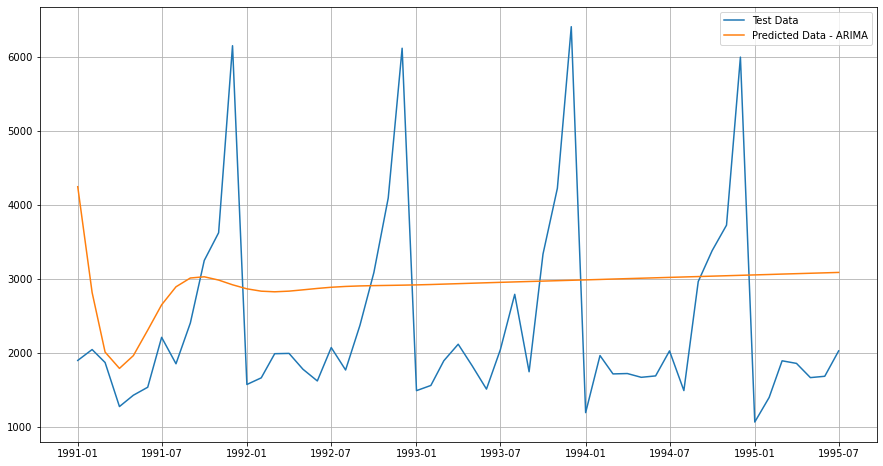

In [432]:
#plt.plot(train_finalS_log_diff,label='Training Data')
plt.plot(test_finalS,label='Test Data')
plt.plot(test_finalS.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model Sparkling - 1

In [321]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [511]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_finalS['Sparkling'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:1

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:2447.5387828489993
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:2324.3659519133444
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:2183.9313603712776
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:2287.9081352098424
SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:2207.851023620986


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:1

SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:2129.2633658166856
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:2162.3372455347
SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:2124.2590823541104


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:2110.781122470305
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:2337.1070158961943
SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:2235.5488414957


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:1

SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:2112.8758493700475
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:2243.1102786026663


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:2153.3085406808877
SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:2146.2998706482713


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:2125.6707822317258


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:2099.4714594058278


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueW

SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:2064.9752187598324
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:2278.5069170270194
SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:2182.518619917103


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:2086.719056016567
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:2224.5269411952354


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:2136.489089785847


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:2047.0271833396823
SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:2127.432429448027


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:2101.793286164824


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueW

SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:2061.468342549304
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:2263.0761053927263
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:2183.1226448834414
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:2098.155536711695
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:2183.1841684316746
SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:2169.550488203101


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:1

SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:2085.2912640929612
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:2097.461967449226


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:2099.114819139588


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:2087.283327135802
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:2246.11794872589


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:2145.7603151927483


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:2059.3953172030765
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:2182.5763281035943


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:2143.243278396676


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:2061.2271320183504
SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:2094.0880476094103


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:2089.5355950568724


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:2067.6492005111386
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:2204.033527642694


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:2121.311255514711


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:2035.512506201157


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:2154.2421493503325


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:2121.371936711625


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:2037.291846374756


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:2073.196354094272


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:2074.073615979727


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueW

SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:2038.0566463000762
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:2247.5681896119777
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:2184.094279301183
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:2091.2096730874196
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:2167.5748862140395


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:2163.245498841912


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:2095.763453800751
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:2089.323030877713


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:2063.0487367343885


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:2060.8041219765
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:2222.2155292067637


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:2139.8611501892615


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:2066.5867942924237
SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:2140.7535530384266


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:2137.451907351239


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:2055.8436921854163


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:2056.9753886620992


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:2056.3337456621493


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:2057.313676863989
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:2205.370818023485


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:2123.2843018768176


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:2037.2284009200964
SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:2139.7155395808645


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:2123.360091618984


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:2039.9460445945288
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:2074.2633248098728


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:2047.00107900834
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:2039.5094209426588


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [513]:
dfObj2.sort_values(by=['AIC'])

param      seasonal          AIC
80   (2, 0, 2)  (2, 0, 2, 5)  1128.364183
26   (0, 0, 2)  (2, 0, 2, 5)  1134.482569
53   (1, 0, 2)  (2, 0, 2, 5)  1136.445964
23   (0, 0, 2)  (1, 0, 2, 5)  1137.496036
20   (0, 0, 2)  (0, 0, 2, 5)  1137.638258
..         ...           ...          ...
180  (0, 0, 2)  (0, 0, 0, 5)  2278.506917
165  (0, 0, 0)  (1, 0, 0, 5)  2287.908135
163  (0, 0, 0)  (0, 0, 1, 5)  2324.365952
171  (0, 0, 1)  (0, 0, 0, 5)  2337.107016
162  (0, 0, 0)  (0, 0, 0, 5)  2447.538783

[243 rows x 3 columns]

In [514]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_finalS['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -684.814
Date:                            Sun, 26 Jul 2020   AIC                           1387.628
Time:                                    22:37:24   BIC                           1410.324
Sample:                                01-01-1980   HQIC                          1396.788
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5623      0.332     -1.695      0.090      -1.212       0.088
ar.L2          0.0325      0.167   

In [515]:
#final_hat_avg =test_finalS.copy()
pred_SARIMA = results.get_forecast(steps=len(test_finalS))
pred_SARIMA.predicted_mean

1991-01-01    1486.065507
1991-02-01    1445.532997
1991-03-01    1799.462304
1991-04-01    1729.606373
1991-05-01    1561.671754
1991-06-01    1427.447908
1991-07-01    1904.333849
1991-08-01    1662.161443
1991-09-01    2400.263188
1991-10-01    3306.874557
1991-11-01    4386.882286
1991-12-01    6270.815329
1992-01-01    1530.991879
1992-02-01    1364.778134
1992-03-01    1790.281891
1992-04-01    1658.376373
1992-05-01    1535.583989
1992-06-01    1378.974308
1992-07-01    1867.116503
1992-08-01    1646.469544
1992-09-01    2381.366965
1992-10-01    3303.225199
1992-11-01    4345.768593
1992-12-01    6253.746548
1993-01-01    1503.278634
1993-02-01    1322.663278
1993-03-01    1753.824953
1993-04-01    1617.592731
1993-05-01    1501.848922
1993-06-01    1347.401152
1993-07-01    1829.418263
1993-08-01    1597.542161
1993-09-01    2342.241169
1993-10-01    3236.789595
1993-11-01    4298.434237
1993-12-01    6187.029741
1994-01-01    1458.755705
1994-02-01    1295.400565
1994-03-01  

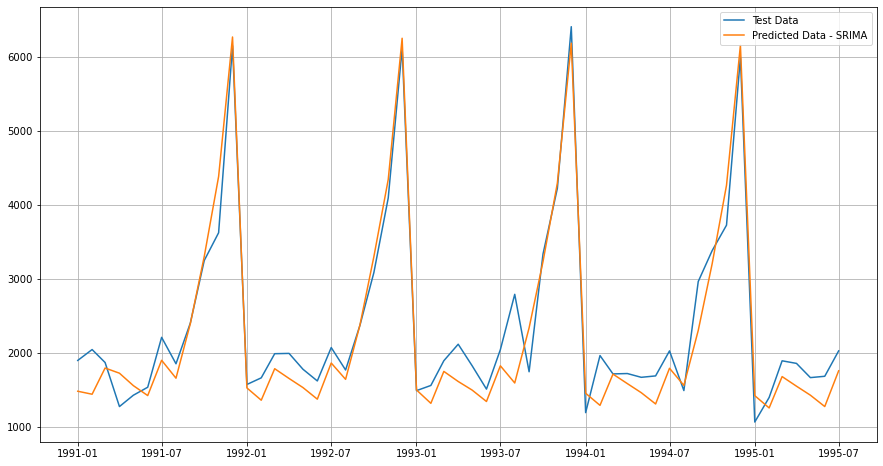

In [516]:
plt.plot(test_finalS,label='Test Data')
plt.plot(test_finalS.index,pred_SARIMA.predicted_mean,label='Predicted Data - SRIMA')
plt.legend(loc='best')
plt.grid();

In [517]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_finalS,pred_SARIMA.predicted_mean))
print(rmse)

345.939116462815


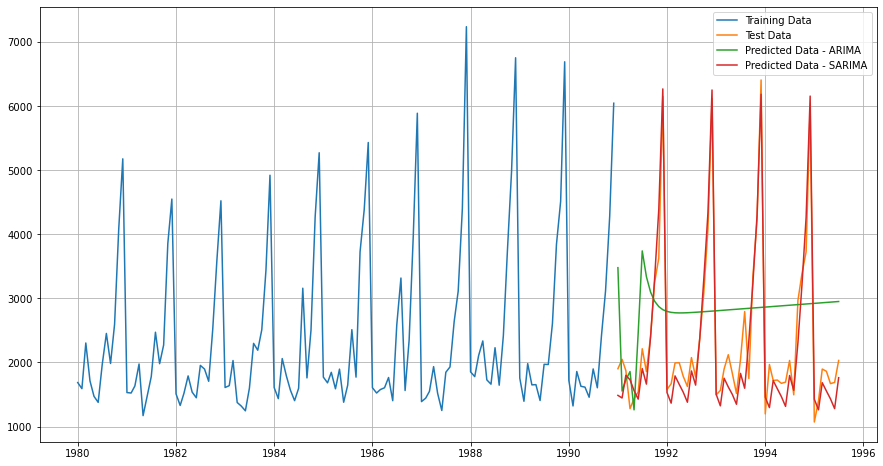

In [520]:
plt.plot(train_finalS,label='Training Data')
plt.plot(test_finalS,label='Test Data')
plt.plot(test_finalS.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_finalS.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

# Build an ARIMA model. - ROSE - 1

In [396]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [521]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
            try:
                mod = ARIMA(train_final['Rose'], order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj = dfObj.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(0, 0, 0) - AIC:1324.8997029577333
ARIMA(0, 0, 1) - AIC:1305.4684057698005
ARIMA(0, 0, 2) - AIC:1306.5866794770418
ARIMA(1, 0, 0) - AIC:1301.5463044368603
ARIMA(1, 0, 1) - AIC:1294.5105851813198
ARIMA(1, 0, 2) - AIC:1292.0532102451502


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(2, 0, 0) - AIC:1302.346074176824
ARIMA(2, 0, 1) - AIC:1292.9371945689113

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



ARIMA(2, 0, 2) - AIC:1292.2480553293049


In [522]:
dfObj.sort_values(by=['AIC']).head()

param          AIC
2  (0, 0, 2)  1276.835382
5  (1, 0, 2)  1277.359225
4  (1, 0, 1)  1277.775750
7  (2, 0, 1)  1279.045689
8  (2, 0, 2)  1279.298694

In [534]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_final['Rose'], order=(0,1,2))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.168
Date:                Sun, 26 Jul 2020   AIC                           1276.835
Time:                        22:50:29   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7600      0.101     -7.500      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [535]:
#final_hat_avg =train_finalS_diif1.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA[0]

array([83.95647561, 71.48339748, 70.99485833, 70.50631917, 70.01778002,
       69.52924087, 69.04070171, 68.55216256, 68.0636234 , 67.57508425,
       67.0865451 , 66.59800594, 66.10946679, 65.62092763, 65.13238848,
       64.64384933, 64.15531017, 63.66677102, 63.17823186, 62.68969271,
       62.20115356, 61.7126144 , 61.22407525, 60.73553609, 60.24699694,
       59.75845779, 59.26991863, 58.78137948, 58.29284033, 57.80430117,
       57.31576202, 56.82722286, 56.33868371, 55.85014456, 55.3616054 ,
       54.87306625, 54.38452709, 53.89598794, 53.40744879, 52.91890963,
       52.43037048, 51.94183132, 51.45329217, 50.96475302, 50.47621386,
       49.98767471, 49.49913555, 49.0105964 , 48.52205725, 48.03351809,
       47.54497894, 47.05643978, 46.56790063, 46.07936148, 45.59082232])

In [536]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_ARIMA[0]))
print(rmse)

17.280661715212744


# Build an SARIMA model. - ROSE 1

In [403]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [621]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train_final['Rose'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        dfObj2 = dfObj2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:1

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:1607.5307543879908
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:1453.7019415527927
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:1346.8085541177074
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:1326.0913916364734


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:1239.6087069736182


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:1191.307495744497
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:1233.3792414384438


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:1199.2423565929087


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:1181.6187567533732
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:1481.8198652085207


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:1380.9872015494275


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:1275.1645332434616
SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:1314.2963371064684


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.6924331460834


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:1180.3587715608724


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:1227.7797497040604


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:1198.0962607713518


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:1162.1586537460175
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:1426.8445497961234


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:1330.3382412350609


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:1250.3124639496743
SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:1316.2937895971104


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1219.73868786844


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:1172.5165127588766


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1221.726564520085


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1198.8480009415623


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueW

SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1155.180015400325
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:1331.2484844349851
SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:1283.3695757467372
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1229.602496778058
SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:1283.669727369689


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:1237.4573193656588


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1190.3229112292047
SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1222.1989846287445


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1189.3092765471533


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1180.1763772826175
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:1268.4267544499367


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1221.187394806706


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1174.866279672143
SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1229.6101358645337


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1227.0842970690055


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1174.4648783928433


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1183.7135310126791


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1175.7655676258826


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1172.5515310938501
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.765624239281


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.5814635697895


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1141.2989510702155
SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1231.3182969648162


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1216.5046222554388


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1149.731488808184


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1181.4175202438337


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1181.068843946592


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueW

SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1150.9566353045134
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:1308.2736030498359
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:1270.4631670466065
SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1213.4537936116208
SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:1261.0339817854408


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1229.5499198146417


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1213.2448700493726
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1185.7937010501428


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1200.2168374239095


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1163.7305210198526


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:1266.3761677602022


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1221.6975342657875


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1174.4378713863275


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1220.6976255936406


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1230.1563894111603


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1172.2667079070607
SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1176.4966781762716


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1173.05978351249


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1175.6838839783845
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:1258.680176515887


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1210.930686753017


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1150.5013041415484


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1220.7431912581424


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1217.5328540089388


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1151.3208902303363
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1186.468036494532


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1163.5682235635916
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1152.123274865116


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [453]:
dfObj2.sort_values(by=['AIC']).head()

param      seasonal          AIC
80  (2, 0, 2)  (2, 0, 2, 5)  1128.364183
26  (0, 0, 2)  (2, 0, 2, 5)  1134.482569
53  (1, 0, 2)  (2, 0, 2, 5)  1136.445964
23  (0, 0, 2)  (1, 0, 2, 5)  1137.496036
20  (0, 0, 2)  (0, 0, 2, 5)  1137.638258

In [523]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_final['Rose'],
                                order=(2,1,2),
                                seasonal_order=(2,1,2,5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 5)   Log Likelihood                -537.311
Date:                           Sun, 26 Jul 2020   AIC                           1092.622
Time:                                   22:44:22   BIC                           1117.169
Sample:                               01-01-1980   HQIC                          1102.583
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7261      0.105     -6.888      0.000      -0.933      -0.520
ar.L2          0.2599      0.104      2.496

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [524]:

pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

1991-01-01    100.301875
1991-02-01    103.681819
1991-03-01     79.872333
1991-04-01     75.230338
1991-05-01     78.239411
1991-06-01     77.359281
1991-07-01     75.321878
1991-08-01     75.722813
1991-09-01     75.377371
1991-10-01     70.828738
1991-11-01     76.575499
1991-12-01     88.495983
1992-01-01     72.540986
1992-02-01     73.379427
1992-03-01     71.827706
1992-04-01     75.106642
1992-05-01     75.524586
1992-06-01     72.268408
1992-07-01     69.865862
1992-08-01     68.841946
1992-09-01     71.289253
1992-10-01     81.305216
1992-11-01     67.735992
1992-12-01     69.693395
1993-01-01     66.038297
1993-02-01     71.281831
1993-03-01     73.029464
1993-04-01     68.151742
1993-05-01     65.174488
1993-06-01     65.345813
1993-07-01     66.683484
1993-08-01     75.744027
1993-09-01     63.311600
1993-10-01     65.510417
1993-11-01     61.223483
1993-12-01     67.046481
1994-01-01     69.508103
1994-02-01     63.803953
1994-03-01     60.787792
1994-04-01     61.244047


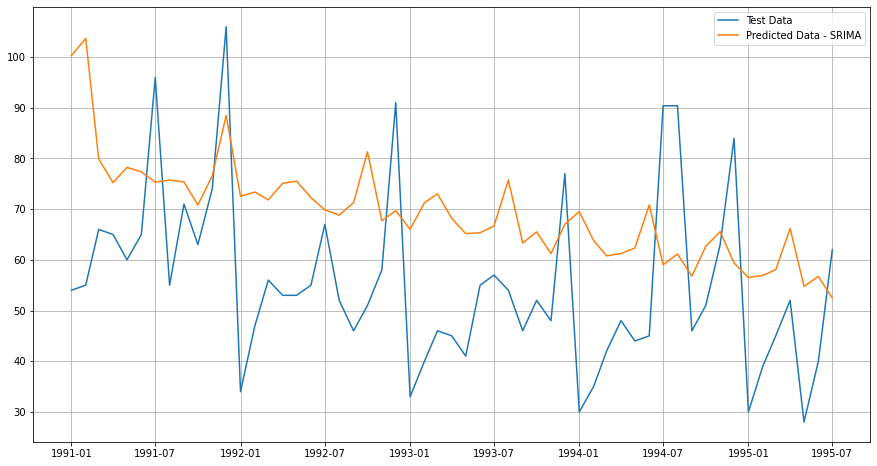

In [525]:
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SRIMA')
plt.legend(loc='best')
plt.grid();

In [526]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_SARIMA.predicted_mean))
print(rmse)

22.210707004039197


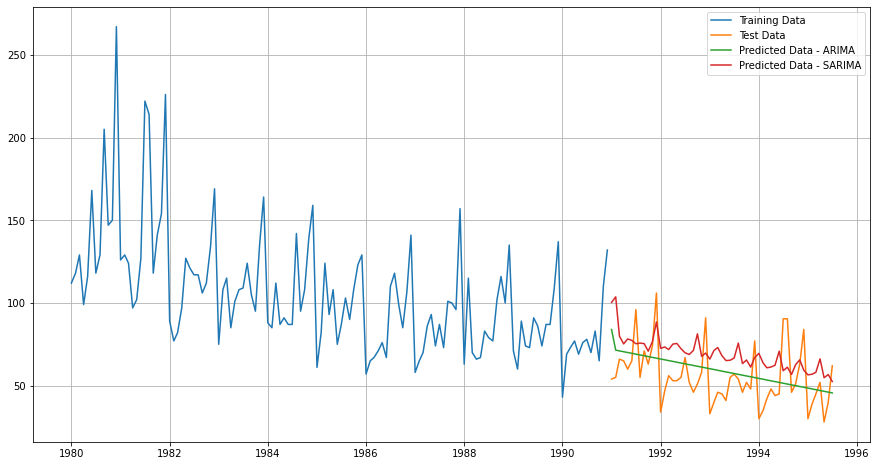

In [538]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

#  ACF and PACF - Rose

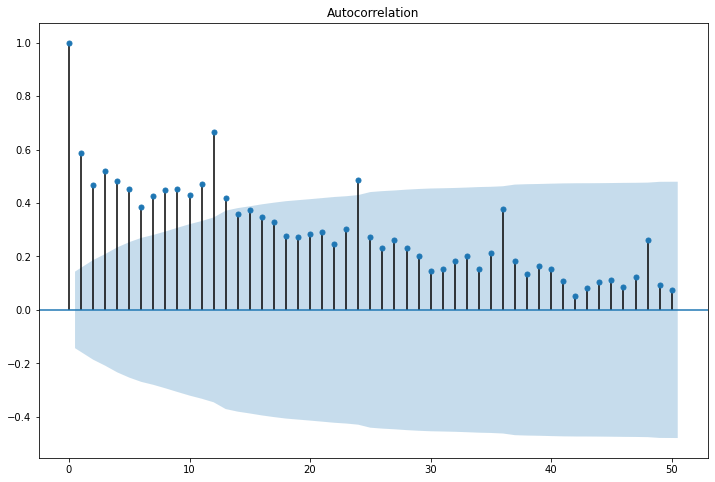

In [335]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8))
plot_acf(df_model['Rose'],lags=50,  ax=plt.gca())
plt.show()


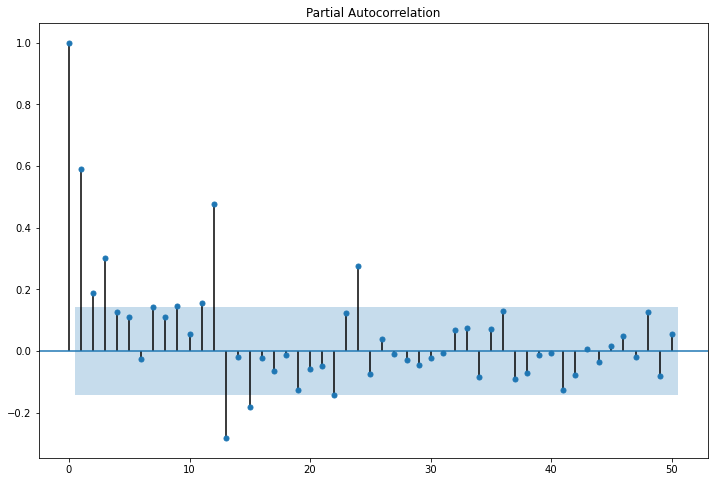

In [336]:
plt.figure(figsize=(12,8))
plot_pacf(df_model['Rose'], lags=50, ax=plt.gca())
plt.show()

#  ACF and PACF - Sparkling

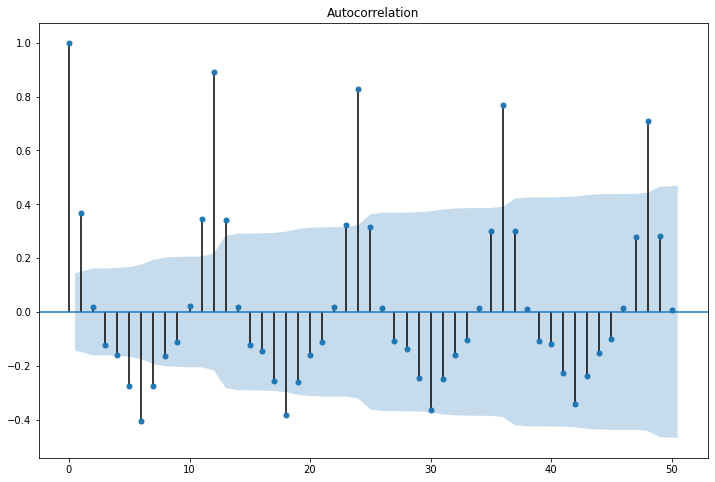

In [463]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,8))
plot_acf(df_modelS['Sparkling'],lags=50,  ax=plt.gca())
plt.show()


C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



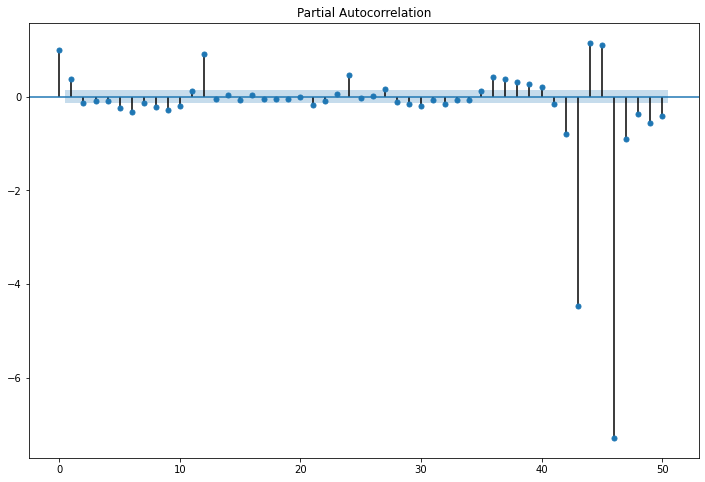

In [464]:
plt.figure(figsize=(12,8))
plot_pacf(df_modelS['Sparkling'], lags=50, ax=plt.gca())
plt.show()

# Build an ARIMA model. - SPARKING

In [539]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_finalS['Sparkling'], order=(4,1,8))#418

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(4, 1, 8)   Log Likelihood               -1061.430
Method:                       css-mle   S.D. of innovations            731.059
Date:                Sun, 26 Jul 2020   AIC                           2150.860
Time:                        22:56:21   BIC                           2191.112
Sample:                    02-01-1980   HQIC                          2167.216
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5543      0.553     10.036      0.000       4.470       6.639
ar.L1.D.Sparkling    -0.5334      0.089     -6.006      0.000      -0.708      -0.359
ar.L2.D.Sparkling    -0.

In [540]:
#final_hat_avg =train_finalS_diif.copy()
pred_ARIMA = results_Arima.forecast(steps=len(test_finalS))
pred_ARIMA[0]

array([2676.947295  , 2415.14166307, 2825.93851407, 2734.57162796,
       1957.49312288, 2230.74487989, 2897.33134833, 3380.73949825,
       2277.23098307, 2387.54833769, 2981.59623662, 3422.98535143,
       2319.11037964, 2416.71710382, 3007.0808235 , 3438.37706332,
       2348.45472338, 2440.23554311, 3029.87343599, 3452.69832383,
       2377.12283833, 2463.55245813, 3052.48262969, 3467.09850368,
       2405.64729686, 2486.90926912, 3075.02265929, 3481.62624626,
       2434.05448534, 2510.31476364, 3097.50072692, 3496.2810753 ,
       2462.34810554, 2533.76739381, 3119.91919055, 3511.06038469,
       2490.53078188, 2557.26520812, 3142.2801329 , 3525.96153658,
       2518.60502858, 2580.80629364, 3164.58556722, 3540.98195348,
       2546.57329457, 2604.3887942 , 3186.83744807, 3556.11912072,
       2574.43796703, 2628.01090963, 3209.03767331, 3571.37058507,
       2602.20137313, 2651.67089429, 3231.18808568])

In [541]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_finalS,pred_ARIMA[0]))
print(rmse)

1243.0968911338548


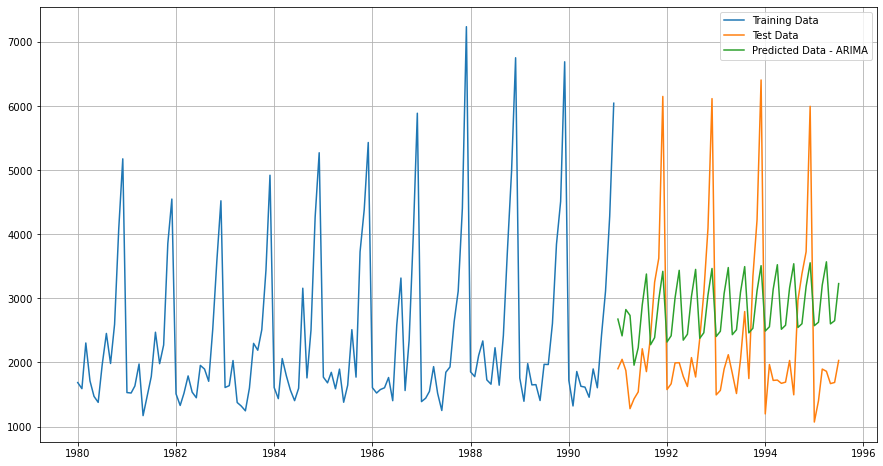

In [543]:
plt.plot(train_finalS,label='Training Data')
plt.plot(test_finalS,label='Test Data')
plt.plot(test_finalS.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model Sparkling

In [612]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_finalS['Sparkling'],
                                #order=(2,0,2),
                                seasonal_order=(4,1,8,12),#4,1,8,12 -- 11912-1195
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                                 SARIMAX Results                                                 
Dep. Variable:                                                 Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(4, 1, [1, 2, 3, 4, 5, 6, 7, 8], 12)   Log Likelihood                -157.947
Date:                                                   Sun, 26 Jul 2020   AIC                            343.893
Time:                                                           23:24:40   BIC                            359.790
Sample:                                                       01-01-1980   HQIC                           347.891
                                                            - 12-01-1990                                         
Covariance Type:                                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

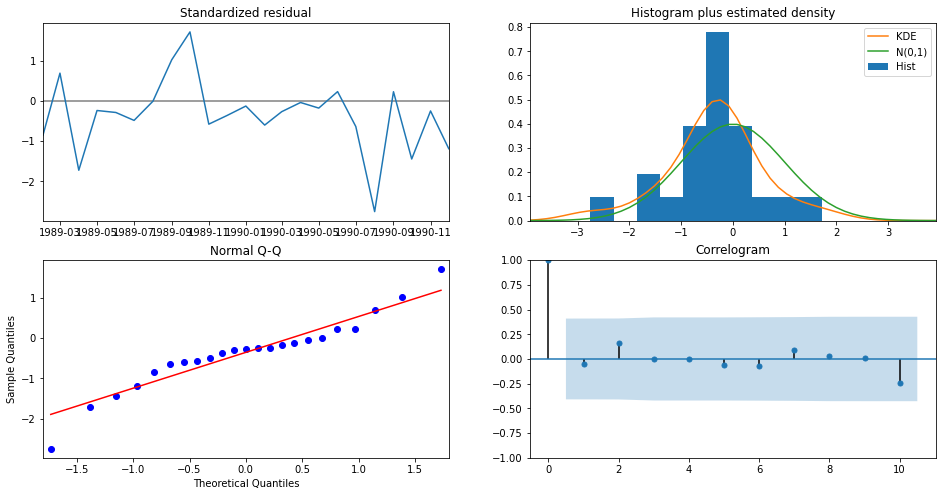

In [545]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [546]:
#final_hat_avg =test_finalS.copy()
pred_SARIMA = results.get_forecast(steps=len(test_finalS))
pred_SARIMA.predicted_mean

1991-01-01    1656.078769
1991-02-01    1319.191369
1991-03-01    1806.388925
1991-04-01    1558.777937
1991-05-01    1582.299486
1991-06-01    1364.066833
1991-07-01    1852.303319
1991-08-01    2071.892933
1991-09-01    2316.245592
1991-10-01    2983.323794
1991-11-01    4158.444156
1991-12-01    6026.942580
1992-01-01    1663.589188
1992-02-01    1395.055539
1992-03-01    1809.717873
1992-04-01    1595.685414
1992-05-01    1617.335015
1992-06-01    1371.812646
1992-07-01    1836.732629
1992-08-01    2218.407975
1992-09-01    2169.035141
1992-10-01    2977.568398
1992-11-01    4167.631170
1992-12-01    5850.592317
1993-01-01    1649.164198
1993-02-01    1438.258445
1993-03-01    1779.810445
1993-04-01    1622.763729
1993-05-01    1641.600956
1993-06-01    1371.593984
1993-07-01    1927.458087
1993-08-01    2410.807095
1993-09-01    2074.053690
1993-10-01    2936.119169
1993-11-01    4164.210299
1993-12-01    5873.023135
1994-01-01    1623.444188
1994-02-01    1468.993305
1994-03-01  

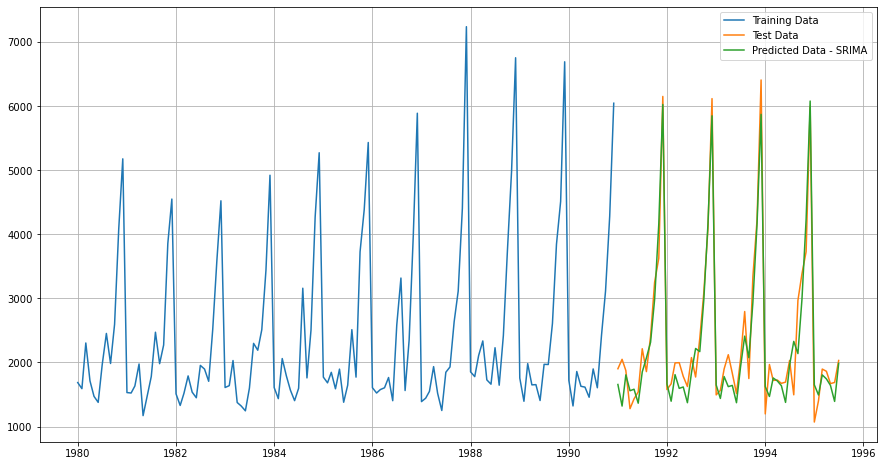

In [547]:
plt.plot(train_finalS,label='Training Data')
plt.plot(test_finalS,label='Test Data')
plt.plot(test_finalS.index,pred_SARIMA.predicted_mean,label='Predicted Data - SRIMA')
plt.legend(loc='best')
plt.grid();

In [548]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_finalS,pred_SARIMA.predicted_mean))
print(rmse)

328.3114822666359


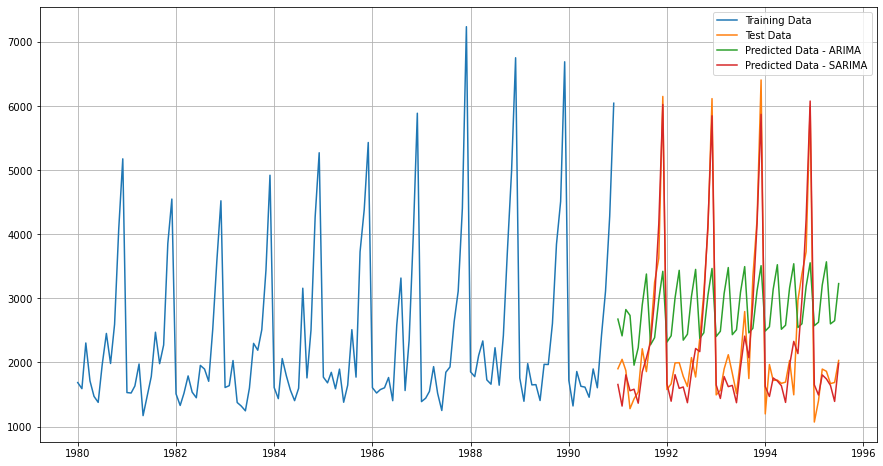

In [550]:
plt.plot(train_finalS,label='Training Data')
plt.plot(test_finalS,label='Test Data')
plt.plot(test_finalS.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_finalS.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

# Build an ARIMA model. - ROSE

In [551]:
# Creating an empty Dataframe with column names only
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj

Empty DataFrame
Columns: [param, AIC]
Index: []

In [616]:
## ARIMA(1,0,2) has the lowest AIC
mod = ARIMA(train_final['Rose'], order=(1,1,8))

results_Arima = mod.fit()

print(results_Arima.summary())

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(1, 1, 8)   Log Likelihood                -628.296
Method:                       css-mle   S.D. of innovations             28.379
Date:                Sun, 26 Jul 2020   AIC                           1278.593
Time:                        23:25:44   BIC                           1310.220
Sample:                    02-01-1980   HQIC                          1291.444
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4953   5.89e-08  -8.41e+06      0.000      -0.495      -0.495
ar.L1.D.Rose    -1.0000        nan        nan        nan         nan         nan
ma.L1.D.Rose     0.3176        nan        na

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning:

invalid value encountered in sqrt



In [560]:

pred_ARIMA = results_Arima.forecast(steps=len(test_final))
pred_ARIMA[0]

array([68.0463406 , 79.97640637, 68.1886061 , 74.0462408 , 61.45578348,
       71.32557643, 65.36083982, 73.16415365, 64.370145  , 72.17345769,
       63.37945018, 71.18276173, 62.38875536, 70.19206578, 61.39806054,
       69.20136982, 60.40736572, 68.21067386, 59.4166709 , 67.2199779 ,
       58.42597608, 66.22928195, 57.43528126, 65.23858599, 56.44458644,
       64.24789003, 55.45389162, 63.25719408, 54.4631968 , 62.26649812,
       53.47250199, 61.27580216, 52.48180717, 60.28510621, 51.49111235,
       59.29441025, 50.50041753, 58.30371429, 49.50972271, 57.31301834,
       48.51902789, 56.32232238, 47.52833307, 55.33162642, 46.53763825,
       54.34093046, 45.54694343, 53.35023451, 44.55624861, 52.35953855,
       43.56555379, 51.36884259, 42.57485897, 50.37814664, 41.58416415])

In [561]:
from math import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_ARIMA[0]))
print(rmse)

16.99159875046556


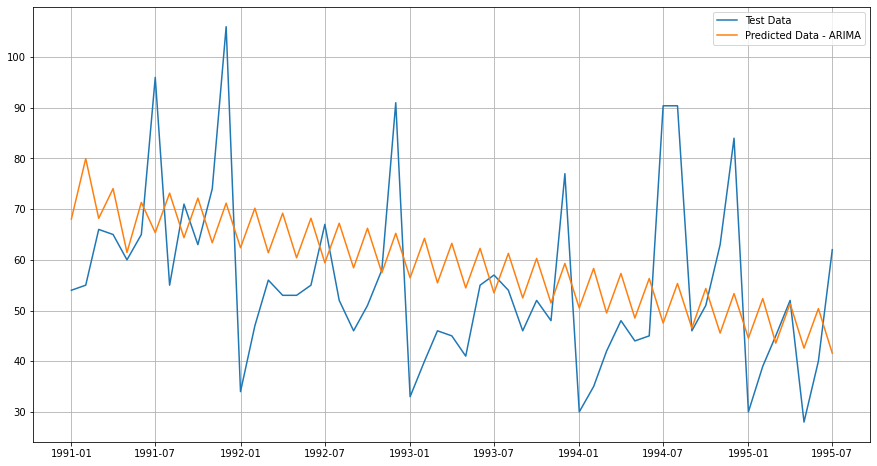

In [562]:
plt.plot(train_final='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

# Build an SARIMA model. - ROSE

In [403]:
### As the dataset has seasonality.. Let's build the model with SARIMA
dfObj2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [600]:
## SARIMA(1,0,2)(0,0,2,5) - AIC:6914.849775
mod = sm.tsa.statespace.SARIMAX(train_final['Rose'],
                                #order=(2,0,2),
                                seasonal_order=(4,1,8,12),#411212-27
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.

C:\Users\Umang Mahant\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                                 SARIMAX Results                                                 
Dep. Variable:                                                      Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(4, 1, [1, 2, 3, 4, 5, 6, 7, 8], 12)   Log Likelihood                 -90.626
Date:                                                   Sun, 26 Jul 2020   AIC                            209.253
Time:                                                           23:13:27   BIC                            225.150
Sample:                                                       01-01-1980   HQIC                           213.251
                                                            - 12-01-1990                                         
Covariance Type:                                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------

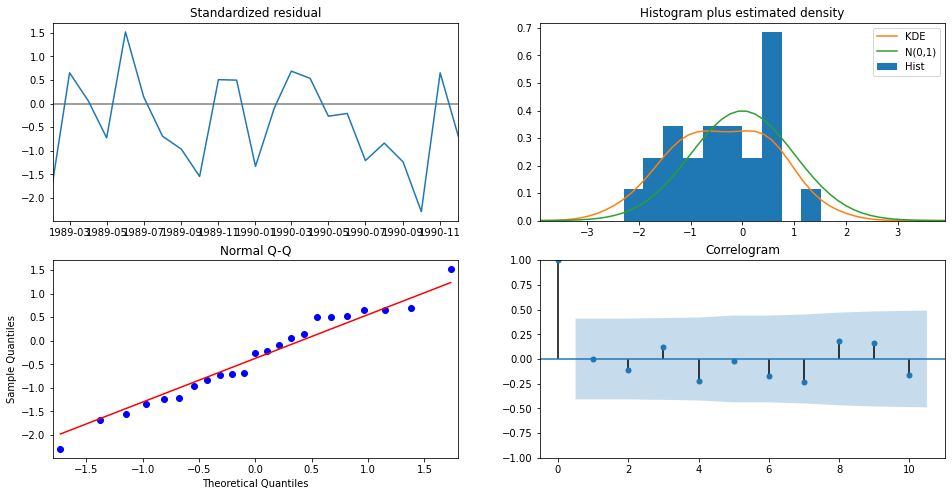

In [601]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [602]:

pred_SARIMA = results.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

1991-01-01     57.632094
1991-02-01     74.461394
1991-03-01     70.318682
1991-04-01     79.099591
1991-05-01     78.429457
1991-06-01     77.188277
1991-07-01     77.879192
1991-08-01     64.135516
1991-09-01     93.667140
1991-10-01     91.626423
1991-11-01     99.385643
1991-12-01    143.013825
1992-01-01     60.877904
1992-02-01     86.503627
1992-03-01     73.897722
1992-04-01     74.171259
1992-05-01     74.513084
1992-06-01     79.062071
1992-07-01     78.528236
1992-08-01     68.338035
1992-09-01     94.925888
1992-10-01    100.340509
1992-11-01    100.089505
1992-12-01    136.158299
1993-01-01     61.025351
1993-02-01     69.923066
1993-03-01     75.801841
1993-04-01     74.820518
1993-05-01     74.211925
1993-06-01     80.148631
1993-07-01     83.519013
1993-08-01     70.787654
1993-09-01     91.185872
1993-10-01     89.322041
1993-11-01    102.294912
1993-12-01    136.742930
1994-01-01     53.469991
1994-02-01     68.822534
1994-03-01     71.261534
1994-04-01     78.780764


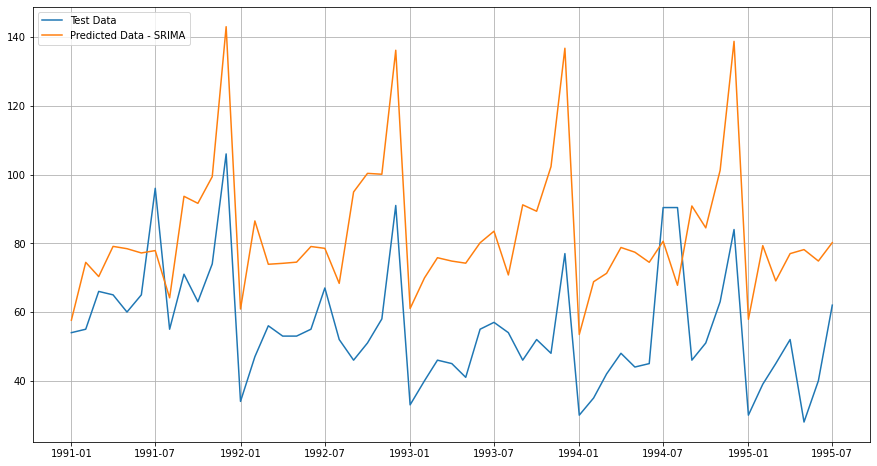

In [603]:
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SRIMA')
plt.legend(loc='best')
plt.grid();

In [604]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final,pred_SARIMA.predicted_mean))
print(rmse)

31.758055931434775


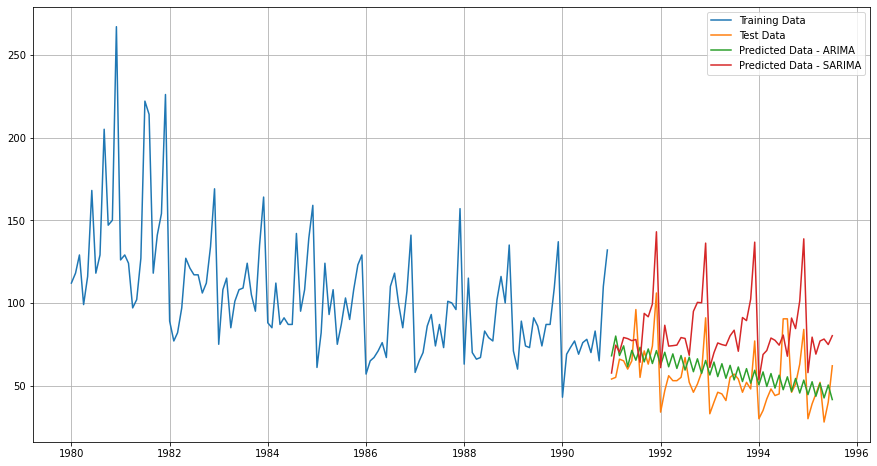

In [605]:
plt.plot(train_final,label='Training Data')
plt.plot(test_final,label='Test Data')
plt.plot(test_final.index,pred_ARIMA[0],label='Predicted Data - ARIMA')
plt.plot(test_final.index,pred_SARIMA.predicted_mean,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

# Future predict

In [613]:

pred_SARIMA = results.get_forecast(steps=365)
pred_SARIMA.predicted_mean

1991-01-01    1656.078769
1991-02-01    1319.191369
1991-03-01    1806.388925
1991-04-01    1558.777937
1991-05-01    1582.299486
                 ...     
2021-01-01    1652.331639
2021-02-01    1451.180161
2021-03-01    1802.058210
2021-04-01    1678.148906
2021-05-01    1635.305841
Freq: MS, Length: 365, dtype: float64

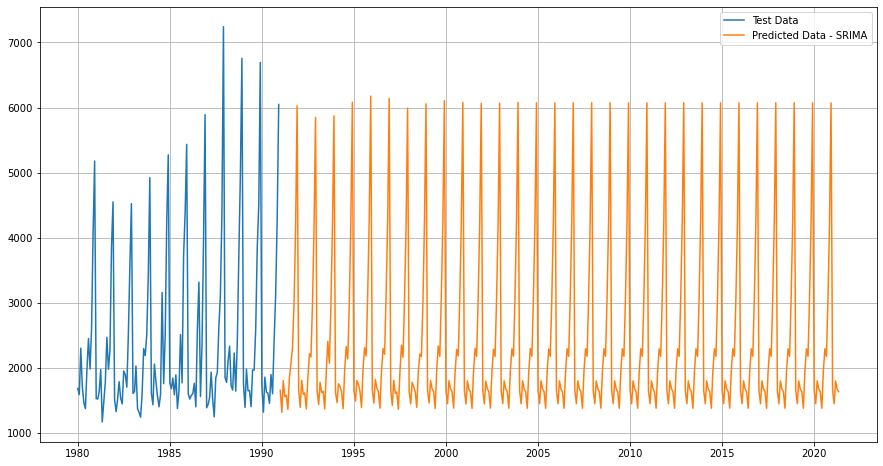

In [615]:
plt.plot(train_finalS,label='Test Data')
plt.plot(pred_SARIMA.predicted_mean,label='Predicted Data - SRIMA')
plt.legend(loc='best')
plt.grid();

In [622]:

pred_ARIMA = results_Arima.forecast(steps=365)
pred_ARIMA[0]

array([ 6.80463406e+01,  7.99764064e+01,  6.81886061e+01,  7.40462408e+01,
        6.14557835e+01,  7.13255764e+01,  6.53608398e+01,  7.31641536e+01,
        6.43701450e+01,  7.21734577e+01,  6.33794502e+01,  7.11827617e+01,
        6.23887554e+01,  7.01920658e+01,  6.13980605e+01,  6.92013698e+01,
        6.04073657e+01,  6.82106739e+01,  5.94166709e+01,  6.72199779e+01,
        5.84259761e+01,  6.62292819e+01,  5.74352813e+01,  6.52385860e+01,
        5.64445864e+01,  6.42478900e+01,  5.54538916e+01,  6.32571941e+01,
        5.44631968e+01,  6.22664981e+01,  5.34725020e+01,  6.12758022e+01,
        5.24818072e+01,  6.02851062e+01,  5.14911123e+01,  5.92944102e+01,
        5.05004175e+01,  5.83037143e+01,  4.95097227e+01,  5.73130183e+01,
        4.85190279e+01,  5.63223224e+01,  4.75283331e+01,  5.53316264e+01,
        4.65376383e+01,  5.43409305e+01,  4.55469434e+01,  5.33502345e+01,
        4.45562486e+01,  5.23595386e+01,  4.35655538e+01,  5.13688426e+01,
        4.25748590e+01,  

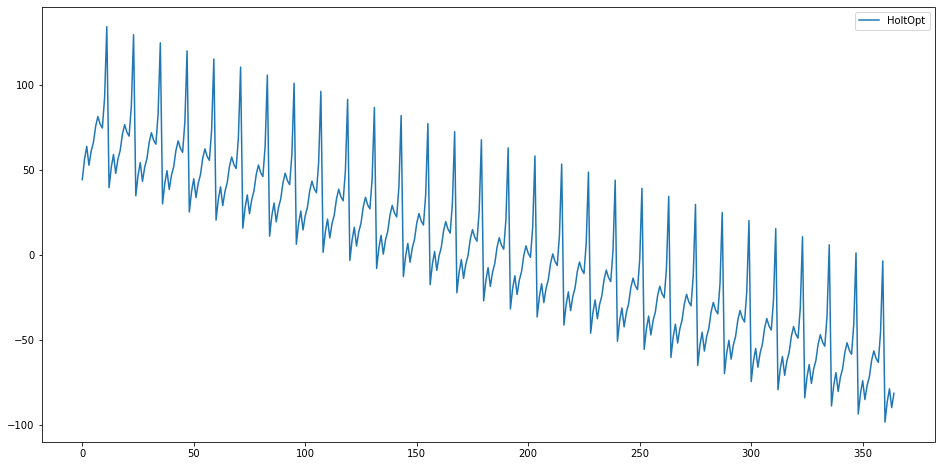

In [628]:
plt.figure(figsize=(16,8))
#plt.plot(df_model, label='Train')
#plt.plot(test_final['Rose'], label='Test')
plt.plot(y_pred1, label='HoltOpt')
plt.legend(loc='best')
plt.show()